1. MonsoonIntensity（季风强度）: Measures the intensity and frequency of monsoon rainfall in the region. Higher values indicate stronger and more frequent rainfall, which could lead to an increased flood risk.

2. TopographyDrainage（地形排水）: Reflects the natural drainage capacity of the terrain. Better drainage (possibly indicated by higher scores) may suggest lower flood risk due to better water flow in densely populated or critical areas.

3. RiverManagement（河流管理）: Assesses the management of rivers in terms of flood control, including the maintenance of riverbanks, dams, and other infrastructure. Higher scores indicate better management, potentially reducing flood risk.

4. Deforestation（森林砍伐）: Measures the rate or extent of deforestation affecting soil stability and water absorption. Higher scores indicate greater loss of forest cover, which could increase flood risk due to reduced water absorption capacity.

5. Urbanization（城市化）: Represents the level of urban development. Increased urbanization typically reduces the land’s ability to absorb rainfall due to the increase in impermeable surfaces. Higher urbanization levels are often associated with increased flood risk.

6. ClimateChange（气候变化）: Assesses the impact of climate change, such as increased rainfall or rising sea levels, which could exacerbate flooding. Higher scores indicate greater vulnerability to these changes.

7. DamsQuality（水坝质量）: Studies the condition and effectiveness of dams in flood prevention. Poorly maintained dams or low-quality dams could result in higher flood risks.

8. Siltation（淤积）: Measures the extent of sediment accumulation in water bodies, which decreases their ability to manage water flow, thereby increasing flood risk.

9. AgriculturalPractices（农业实践）: Assesses the impact of agricultural activities on flood risk, considering factors like irrigation methods and land use, which can influence runoff and soil erosion.

10. Encroachments（侵扰）: Rates the extent of human encroachment into flood-prone areas, which can exacerbate the severity of flooding.

11. IneffectiveDisasterPreparedness（无效的灾难准备）: Reflects deficiencies in disaster preparedness and planning. Higher scores suggest inadequate preparedness, leading to longer recovery times and potentially greater damage.

12. DrainageSystems（排水系统）: Evaluates the efficiency and capacity of drainage systems in urban and rural areas to handle heavy rainfall and water flow.

13. CoastalVulnerability（海岸脆弱性）: Assesses the flood risk in coastal areas due to factors like storm surges, sea-level rise, and cyclone activity.

14. Landslides（滑坡）: Represents the risk and history of landslides. When natural dams caused by landslides fail, they can block rivers and trigger sudden flooding downstream.

15. Watersheds（流域）: Assesses the health and management of watersheds, which play a key role in managing water resources and mitigating flood risks.

16. DeterioratingInfrastructure（不断恶化的基础设施）: Examines the overall condition of infrastructure related to flood management, such as sewers, bridges, and roads. Deteriorating infrastructure can hinder effective flood response.

17. PopulationScore（人口得分）: Measures population density or growth in flood-prone areas, which can impact the effects of floods on human communities.

18. WetlandLoss（湿地流失）: Quantifies the loss of wetlands, which act as natural buffers by absorbing floodwaters.

19. InadequatePlanning（计划不足）: Assesses the extent to which regional and urban planning incorporates flood risk management, including zoning and land-use policies.

20. PoliticalFactors（政治因素）: Considers how political decisions, governance, and policy implementation impact flood management practices.

21. FloodProbability（洪水概率）: The outcome variable that predicts the likelihood of flooding based on the above factors, usually represented as a probability between 0 and 1. 


In [1]:
#loading the database
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
sns.set()  # Set default Seaborn style
sns.set_palette('mako')  # Set the color palette to 'mako'
SNS_CMAP = 'mako'  # Define the color map as 'mako'

colors = sns.palettes.color_palette(SNS_CMAP)  # Get the color palette for the 'mako' color map


sns.set():

设置默认的 Seaborn 样式，使得图表呈现更为美观、清晰（例如，网格线、字体等）。
sns.set_palette('mako'):

设置图表的颜色调色板为 'mako'，这是一种预定义的颜色方案，用于确保图表的颜色风格一致。
SNS_CMAP = 'mako':

这行代码创建了一个变量 SNS_CMAP，并将 'mako' 赋值给它，方便以后引用该颜色方案。
sns.palettes.color_palette(SNS_CMAP):

从 Seaborn 中获取 'mako' 颜色调色板，返回一个包含多个颜色的列表，可以用于应用于图表中的颜色。







In [ ]:
#loading all the data
original_data = pd.read_csv("F:\\Lab_ai\\project_bigdata\\archive (1)\\flood.csv")
train_data = pd.read_csv("F:\\Lab_ai\\project_bigdata\\archive (1)\\flood.csv")
test_data = pd.read_csv("F:\\Lab_ai\\project_bigdata\\archive (1)\\flood.csv")

In [4]:
#data EDA(数据探索)
original_missing = original_data.isnull().sum()
train_missing = train_data.isnull().sum()
test_missing = test_data.isnull().sum()

original_missing, train_missing, test_missing

(MonsoonIntensity                   0
 TopographyDrainage                 0
 RiverManagement                    0
 Deforestation                      0
 Urbanization                       0
 ClimateChange                      0
 DamsQuality                        0
 Siltation                          0
 AgriculturalPractices              0
 Encroachments                      0
 IneffectiveDisasterPreparedness    0
 DrainageSystems                    0
 CoastalVulnerability               0
 Landslides                         0
 Watersheds                         0
 DeterioratingInfrastructure        0
 PopulationScore                    0
 WetlandLoss                        0
 InadequatePlanning                 0
 PoliticalFactors                   0
 FloodProbability                   0
 id                                 0
 dtype: int64,
 MonsoonIntensity                   0
 TopographyDrainage                 0
 RiverManagement                    0
 Deforestation                     

original_missing: This variable shows the number of missing values in each column of the original dataset (original_data).

train_missing: This variable shows the number of missing values in each column of the training dataset (train_data).

test_missing: This variable shows the number of missing values in each column of the testing dataset (test_data).

In [5]:
# The summary statistics for original_data
#No missing value
original_data.describe().style.background_gradient(cmap=SNS_CMAP)


original_data.describe():
提供 original_data 中数值型特征的统计摘要，包括计数（count）、均值（mean）、标准差（std）、最小值（min）、最大值（max）以及分位数（25%、50% 和 75%）。
.style.background_gradient(cmap=SNS_CMAP):
为输出的统计表格添加渐变色背景，使用 SNS_CMAP 作为颜色映射，这样能使表格中的值以颜色渐变的方式呈现，通常用于更直观地显示数据的分布情况。

In [6]:
# The summary statistics for train_data
train_data_drop_id = train_data.drop(columns='id')
train_data_drop_id.describe().style.background_gradient(cmap=SNS_CMAP)
# The summary statistics for test_data
test_data_drop_id = test_data.drop(columns='id')
test_data_drop_id.describe().style.background_gradient(cmap=SNS_CMAP)
#((50000, 21), (1117957, 21), (745305, 20))
original_data.shape,train_data_drop_id.shape,test_data_drop_id.shape


((50000, 22), (50000, 21), (50000, 21))

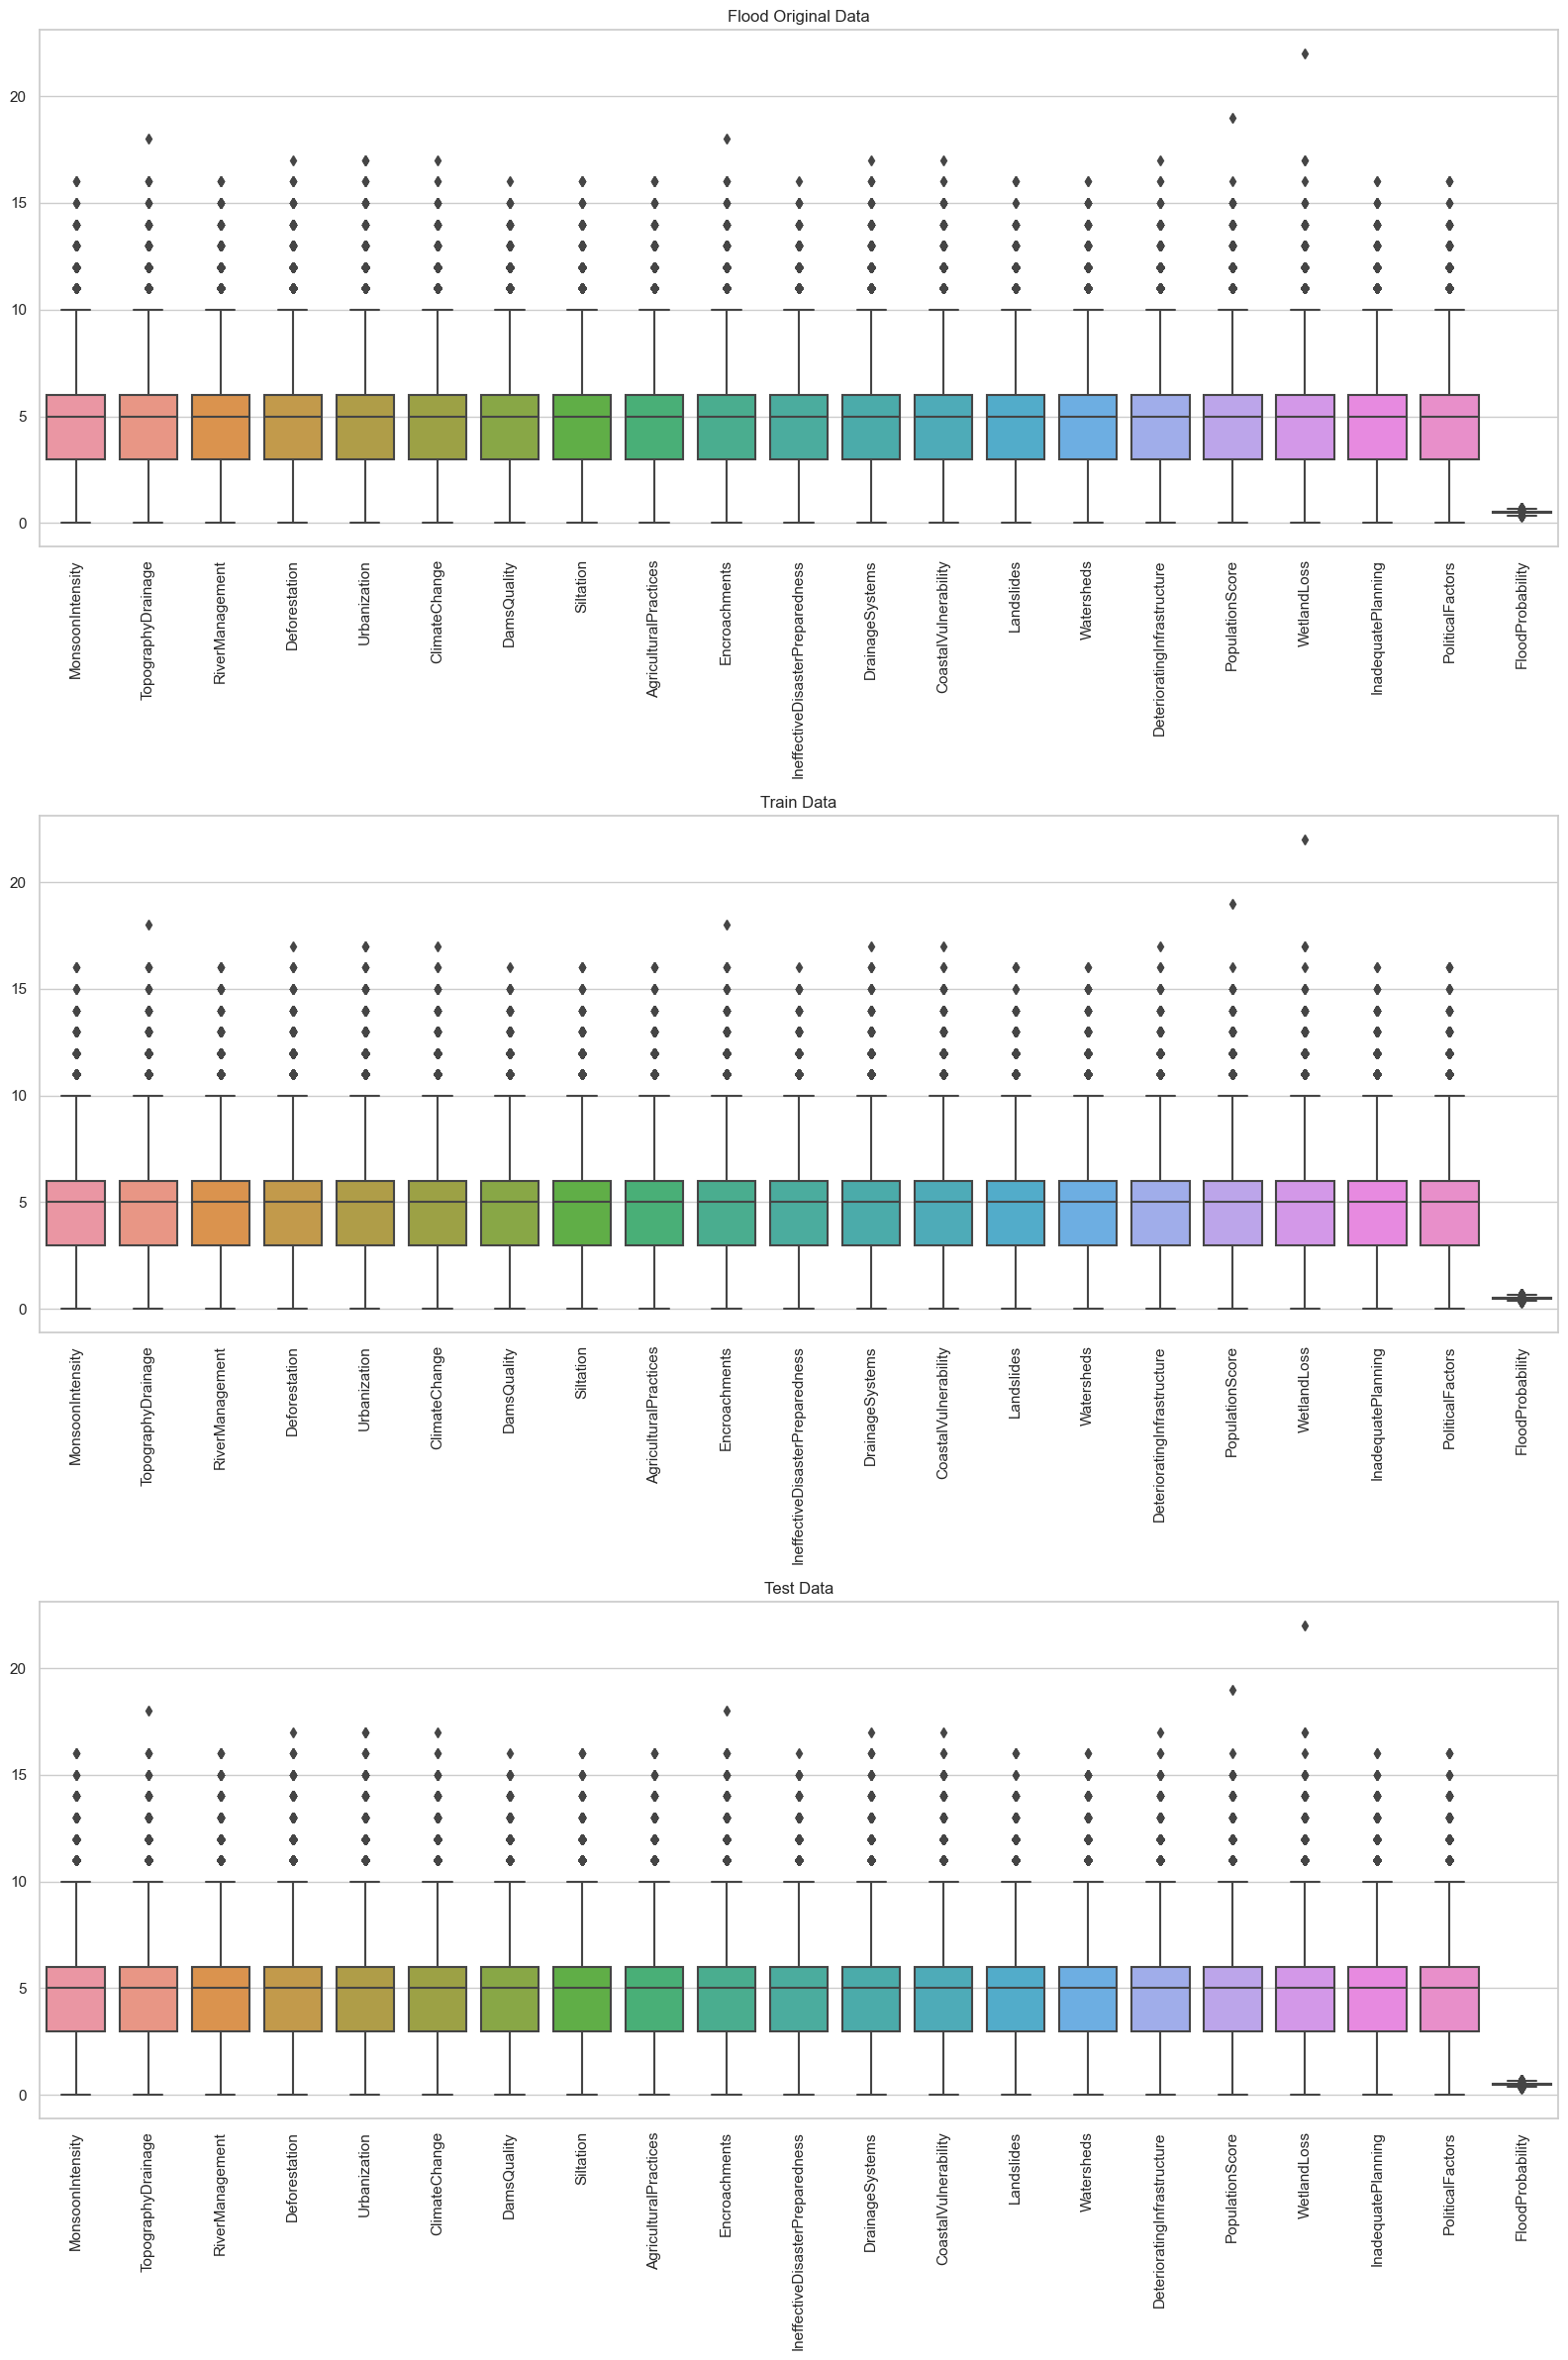

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette for the plots
sns.set(style='whitegrid')  # Set background style to 'whitegrid'
sns.set_palette('mako')  # Set color palette to 'mako'
plt.figure(figsize=(16, 24))  # Set the figure size to 16x24 inches

# Define the datasets and their corresponding titles
datasets = [original_data, train_data_drop_id, test_data_drop_id]
titles = ['Flood Original Data', 'Train Data', 'Test Data']

# Loop through each dataset and create a boxplot
for i, dataset in enumerate(datasets):
    plt.subplot(3, 1, i + 1)  # Set the position for the subplot (3 rows, 1 column, i+1 index)
    sns.boxplot(data=dataset.drop(['id'], axis=1, errors='ignore'))  # Create boxplot, drop 'id' column
    plt.title(titles[i])  # Set the title for the plot
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust the layout to avoid overlap
plt.show()  # Display the plot


使用 seaborn 和 matplotlib 库绘制了三个数据集的箱线图。每个数据集的箱线图被放置在不同的子图中，且去除了 id 列。箱线图帮助用户查看各个特征的分布情况，尤其是异常值。

In [27]:
print(train_data_drop_id.info())
print(train_data_drop_id.describe())
all_columns = train_data_drop_id.columns.tolist()
print("All columns:", all_columns)

cont_cols_debug = [
    f for f in train_data_drop_id.columns
    if train_data_drop_id[f].dtype in [float, int]
]
print("Numeric columns:", cont_cols_debug)

cont_cols = [
    f for f in cont_cols_debug
    if train_data_drop_id[f].nunique() > 2 and f not in ["FloodProbability"]
]
print("Filtered continuous columns:", cont_cols)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [24]:
for col in train_data_drop_id.select_dtypes(include=['object', 'category']).columns:
    try:
        train_data_drop_id[col] = pd.to_numeric(train_data_drop_id[col], errors='coerce')
    except ValueError:
        print(f"Cannot convert column {col} to numeric.")
numeric_cols = [f for f in train_data_drop_id.columns if train_data_drop_id[f].dtype in [float, int]]
print("Numeric columns:", numeric_cols)

cols_with_unique_values = [f for f in numeric_cols if train_data_drop_id[f].nunique() > 2]
print("Columns with >2 unique values:", cols_with_unique_values)

cont_cols = [f for f in cols_with_unique_values if f not in ["FloodProbability"]]
print("Final continuous columns:", cont_cols)


Numeric columns: ['FloodProbability']
Columns with >2 unique values: ['FloodProbability']
Final continuous columns: []


In [37]:
# Check the data types of each column
print(train_data_drop_id.dtypes)

# Check the number of unique values per column
print(train_data_drop_id.nunique())

# Check for missing values in each column
print(train_data_drop_id.isnull().sum())

# Check the numeric columns
numeric_cols = [f for f in train_data_drop_id.columns if train_data_drop_id[f].dtype in [int, float]]
print("Numeric columns:", numeric_cols)

# List the continuous columns (with at least 3 unique values)
cont_cols = [
    f for f in train_data_drop_id.columns 
    if train_data_drop_id[f].dtype in [float, int] and train_data_drop_id[f].nunique() > 2 and f not in ["FloodProbability", "id"]
]
print("Continuous columns:", cont_cols)


MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object
MonsoonIntensity                   17
TopographyDrainage                 18
RiverMa

In [36]:
# Check the data types of each column in the dataset
print(train_data_drop_id.dtypes)
numeric_cols = [f for f in train_data_drop_id.columns if train_data_drop_id[f].dtype in [int,float]]
print("Numeric columns:", numeric_cols)
cont_cols = [
    f for f in train_data_drop_id.columns 
    if train_data_drop_id[f].dtype in [float, int] and train_data_drop_id[f].nunique() > 2 and f not in ["FloodProbability", "id"]
]
print(cont_cols)

MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object
Numeric columns: ['FloodProbability']
[]


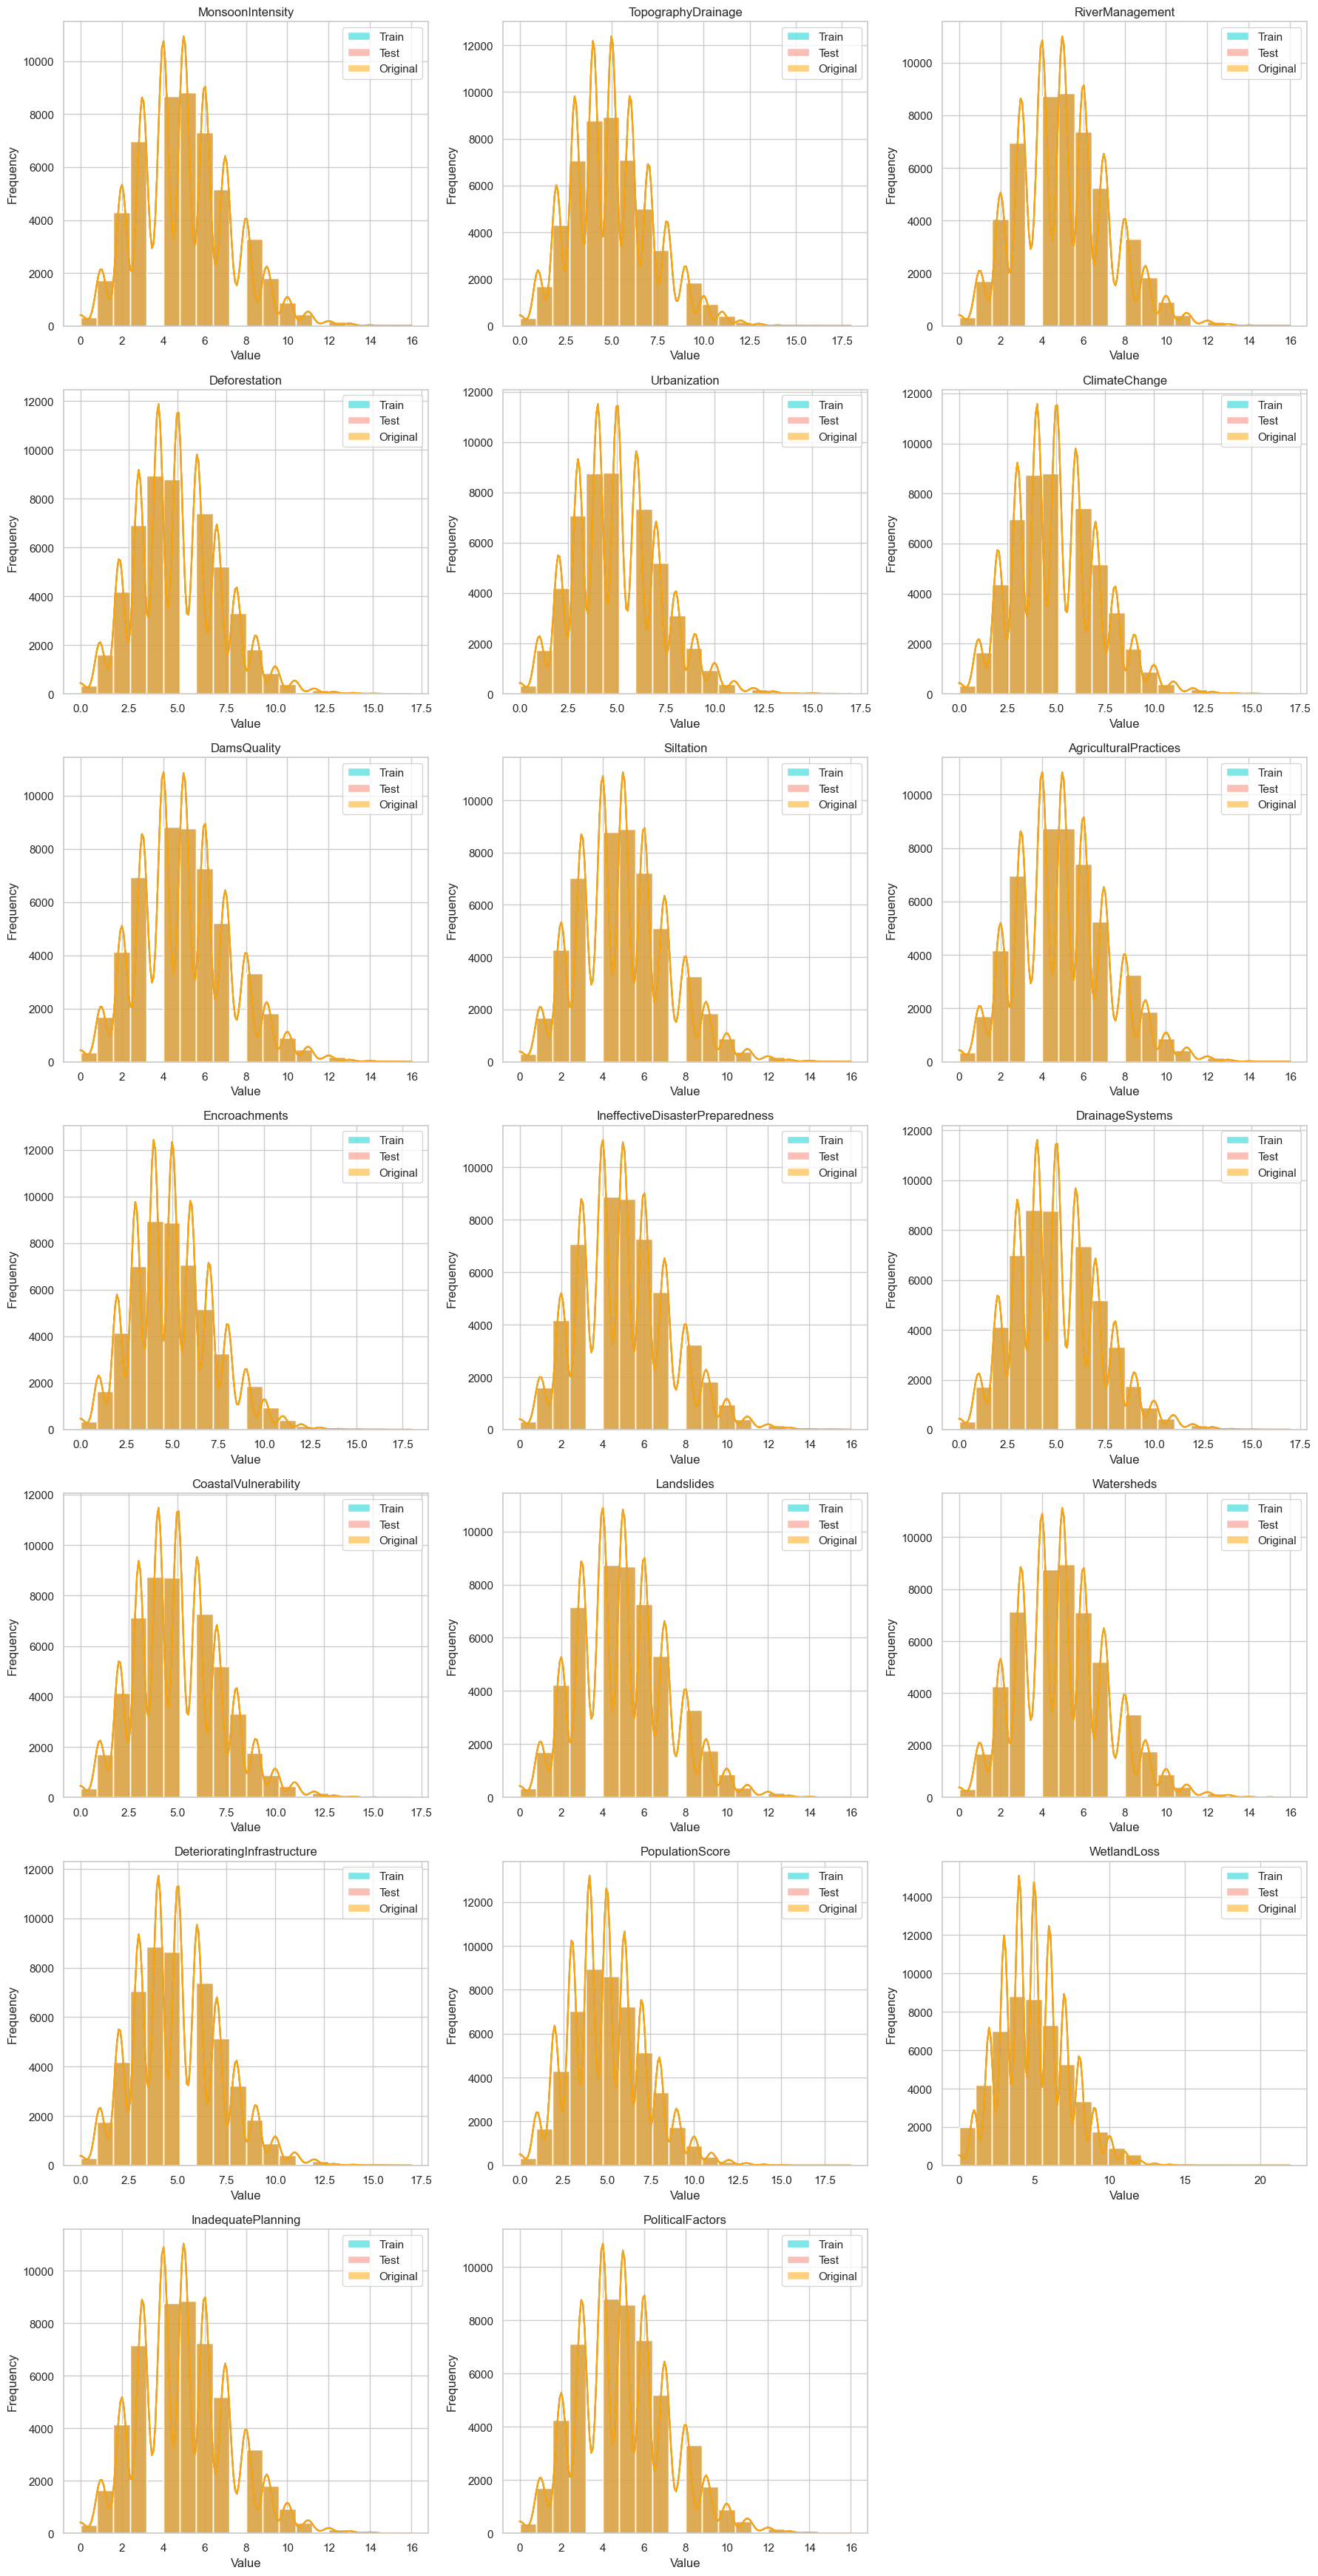

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil, log2

# Select continuous features (numeric columns) from the training data, excluding 'FloodProbability' and 'id'
cont_cols = [
    f for f in train_data_drop_id.columns 
    if f not in ["FloodProbability", "id"]
]

# Check if cont_cols is empty
if not cont_cols:
    print("No continuous columns found in the dataset. Please check your data.")
    plt.close()  # Close the plot if no valid columns exist
else:
    # Calculate the number of rows needed for the subplots (3 columns per row)
    num_rows = (len(cont_cols) + 2) // 3

    # Create subplots for each continuous column
    fig, axs = plt.subplots(num_rows, 3, figsize=(18, num_rows * 5), constrained_layout=True)

    # Ensure axs is a 2D array for consistent indexing
    if num_rows == 1:
        axs = np.expand_dims(axs, axis=0)

    # Loop through each continuous column and plot the histograms
    for i, col in enumerate(cont_cols):
        # Determine the range of values to plot
        max_val = max(train_data_drop_id[col].max(), test_data_drop_id[col].max(), original_data[col].max())
        min_val = min(train_data_drop_id[col].min(), test_data_drop_id[col].min(), original_data[col].min())
        range_val = max_val - min_val

        # Determine the bin size and number of bins
        bin_size = range_val / 20
        num_bins = round(range_val / bin_size)

        # Calculate the subplot position
        row, col_pos = divmod(i, 3)

        # Plot the histograms
        sns.histplot(train_data_drop_id[col], ax=axs[row][col_pos], color='darkturquoise', kde=True, label='Train', bins=num_bins)
        sns.histplot(test_data_drop_id[col], ax=axs[row][col_pos], color='salmon', kde=True, label='Test', bins=num_bins)
        sns.histplot(original_data[col], ax=axs[row][col_pos], color='orange', kde=True, label='Original', bins=num_bins)
        axs[row][col_pos].set_title(col)
        axs[row][col_pos].set_xlabel('Value')
        axs[row][col_pos].set_ylabel('Frequency')
        axs[row][col_pos].legend()

    # Remove any empty subplots if the number of columns is not a multiple of 3
    if len(cont_cols) % 3 != 0:
        for col_pos in range(len(cont_cols) % 3, 3):
            axs[-1][col_pos].remove()

    plt.tight_layout()
    plt.show()


1.选择连续特征：从训练数据集中选择所有数值型的连续特征，排除 FloodProbability 列。

2.计算子图的行数：根据选中的连续特征的数量计算需要的子图行数，每行最多 3 个子图。

3.绘制直方图：对于每个特征，计算其在训练集、测试集和原始数据中的最大值和最小值，从而确定箱子的大小，并绘制直方图。每个数据集的直方图分别用不同的颜色表示。

4.删除空子图：如果最后一行子图有空的（即特征数不足 3 的倍数），删除这些空的子图。

5.显示图表：最后调整布局并显示所有直方图。

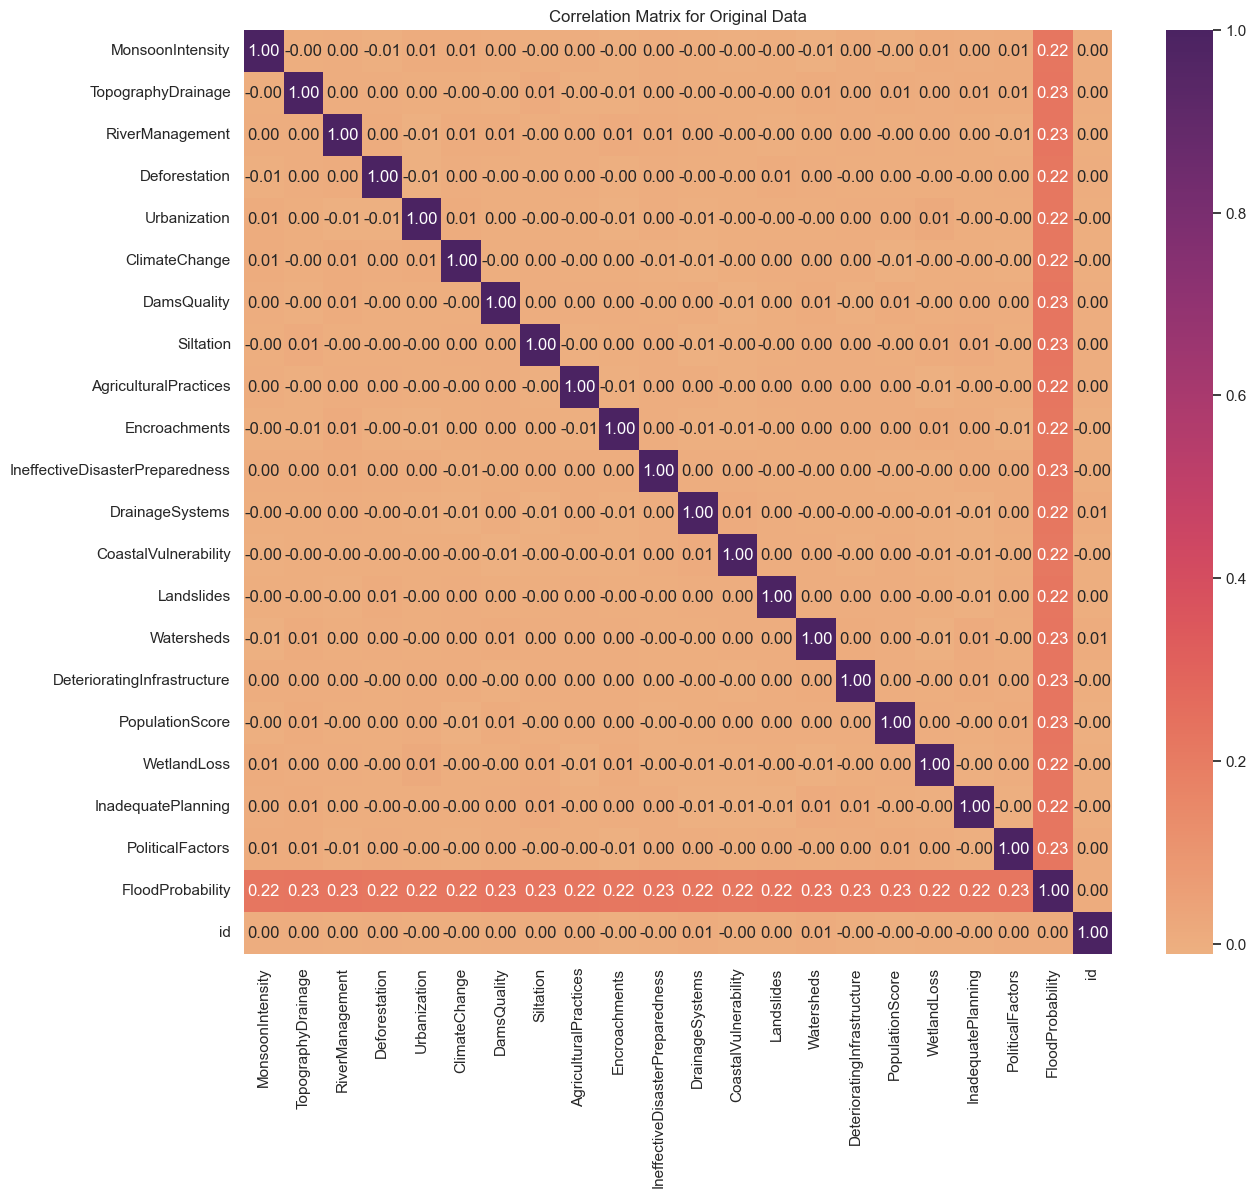

In [30]:
# Calculate the correlation matrix for the original data
correlation_matrix = original_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 12))  # Set figure size for the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='flare', cbar=True)  # Create a heatmap with correlation values
plt.title('Correlation Matrix for Original Data')  # Set the title for the heatmap
plt.show()  # Display the heatmap


1.计算相关矩阵：使用 .corr() 方法计算原始数据集中各个变量之间的相关性。

2.绘制热力图：通过 sns.heatmap 绘制相关矩阵的热力图，其中 annot=True 用于显示相关系数数值，fmt=".2f" 表示保留两位小数，cmap='flare' 设置热力图的颜色映射。

3.显示热力图：设置图表标题为 "Correlation Matrix for Original Data"，并显示热力图。

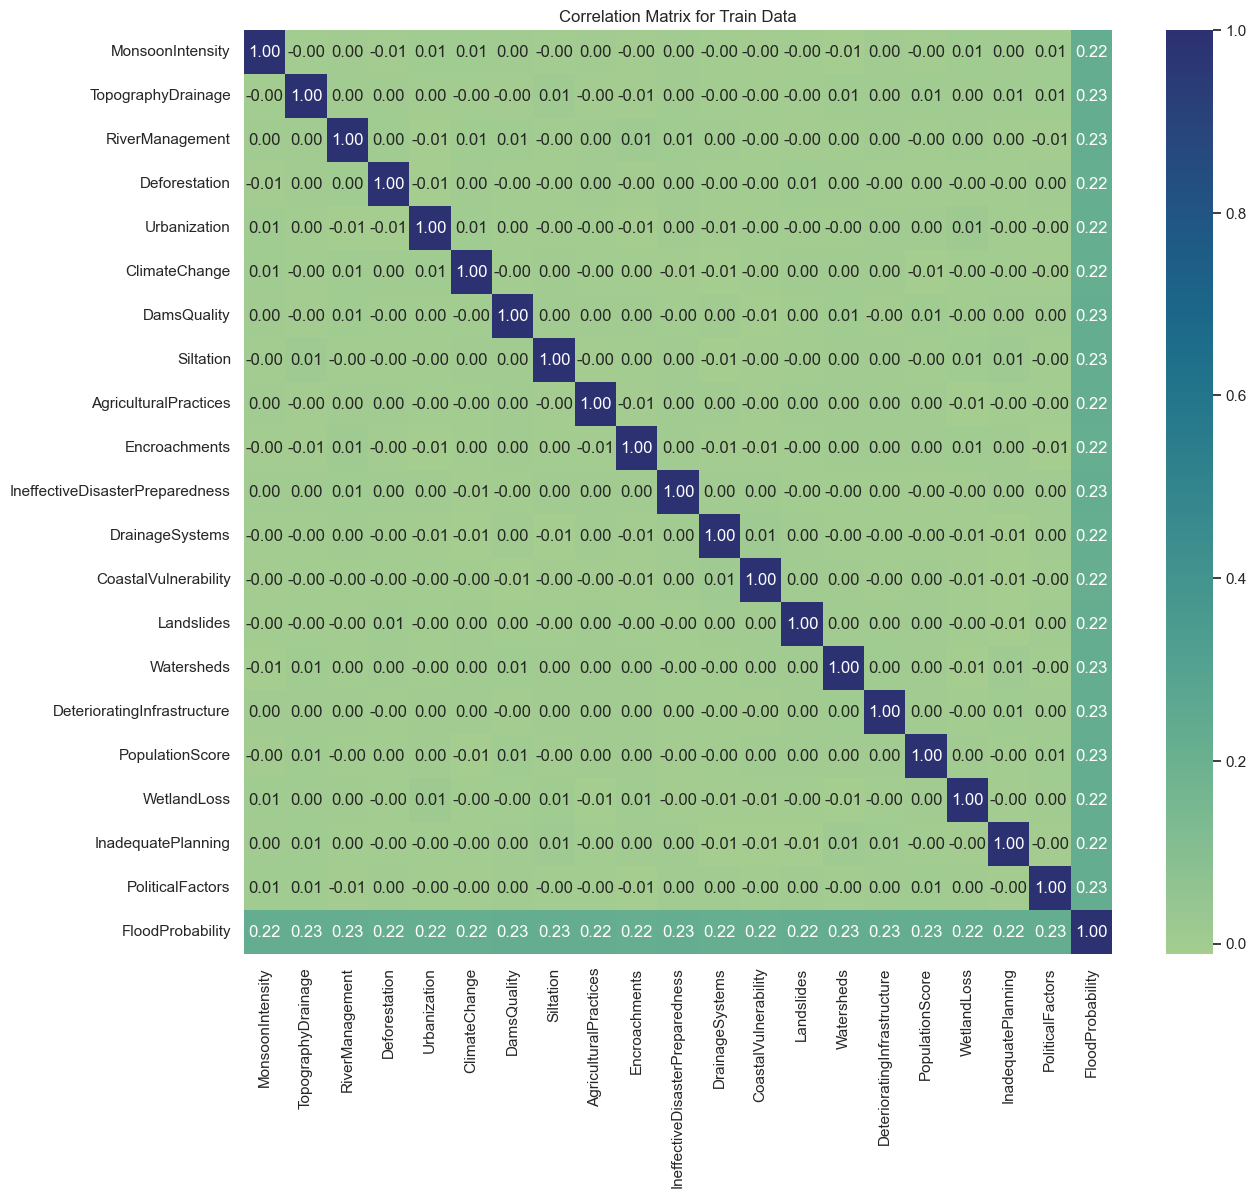

In [31]:
# Calculate the correlation matrix for train_data
correlation_matrix = train_data_drop_id.corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest', cbar=True)
plt.title('Correlation Matrix for Train Data')
plt.show()

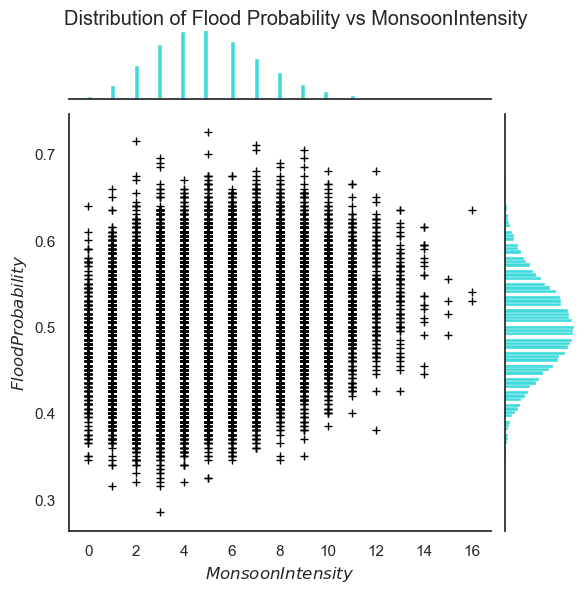

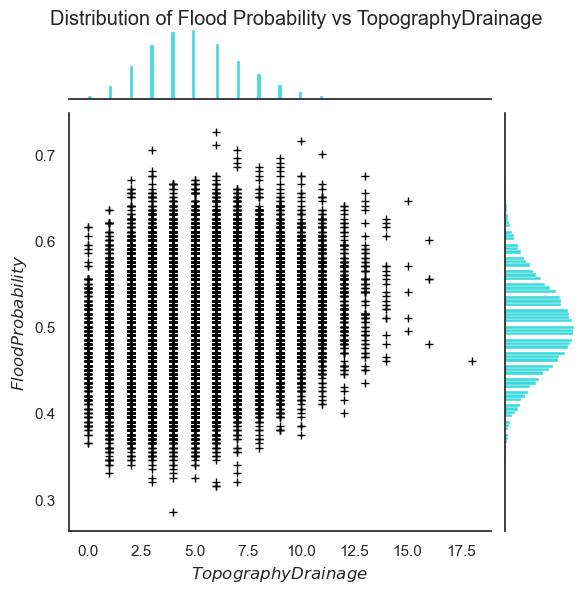

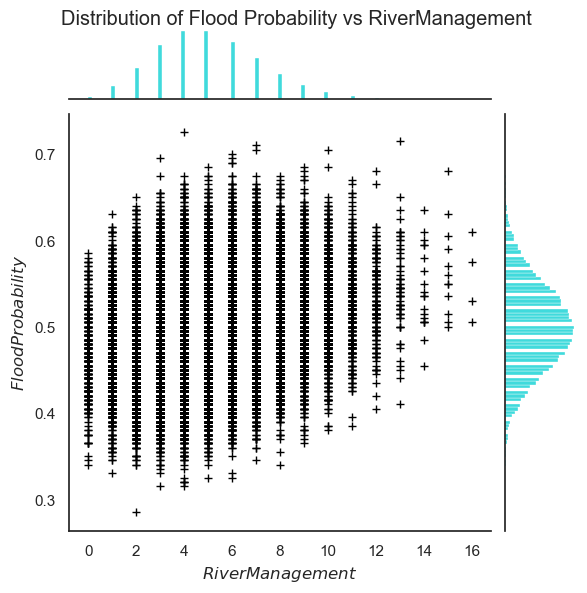

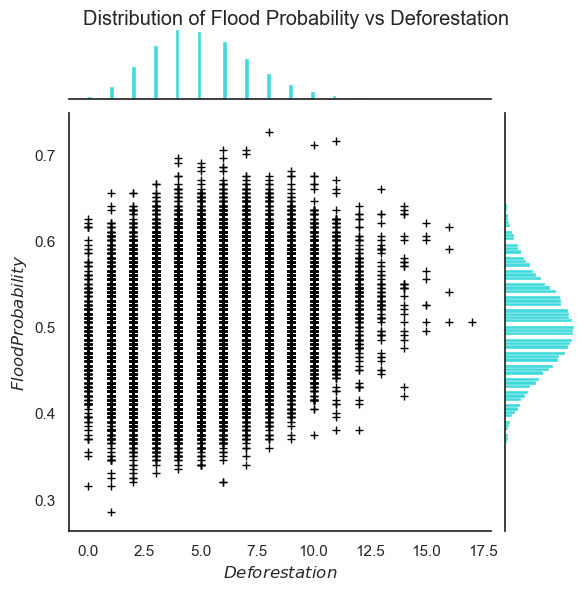

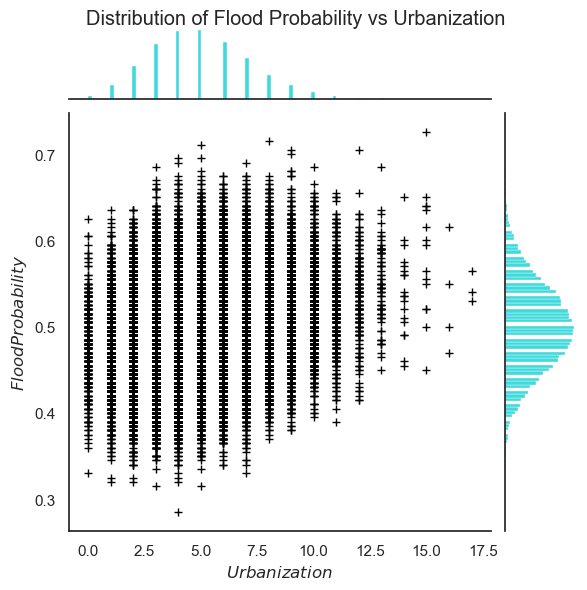

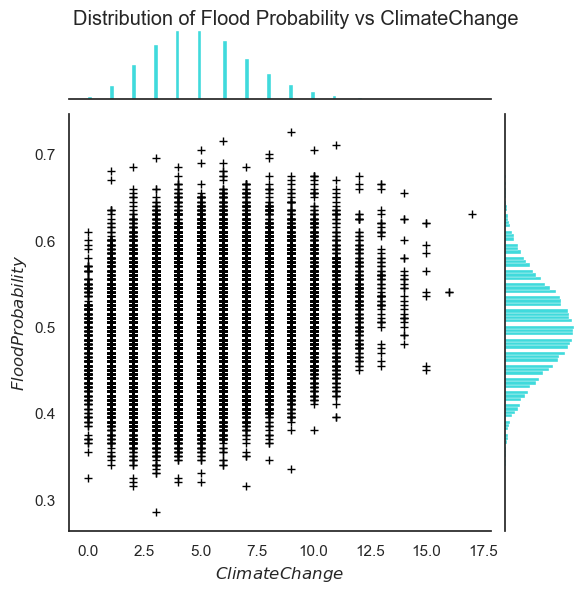

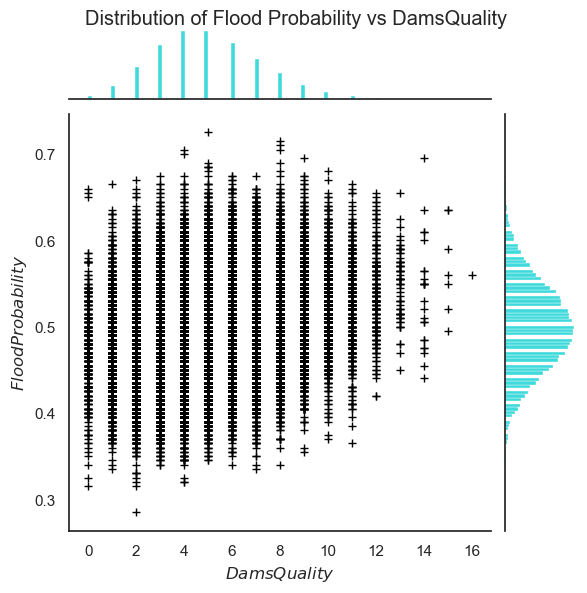

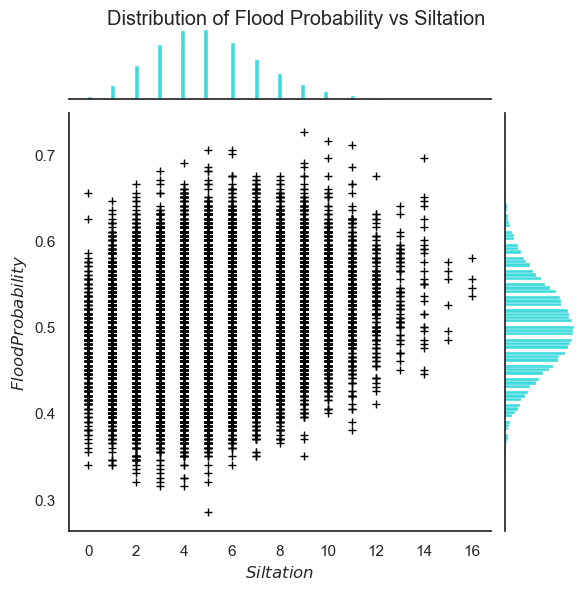

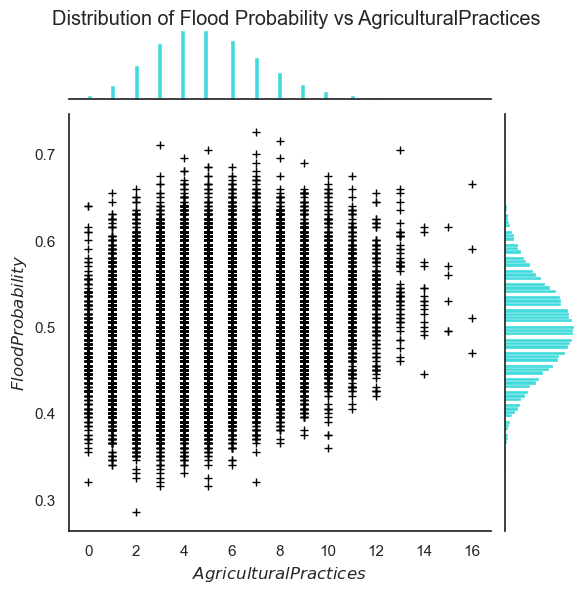

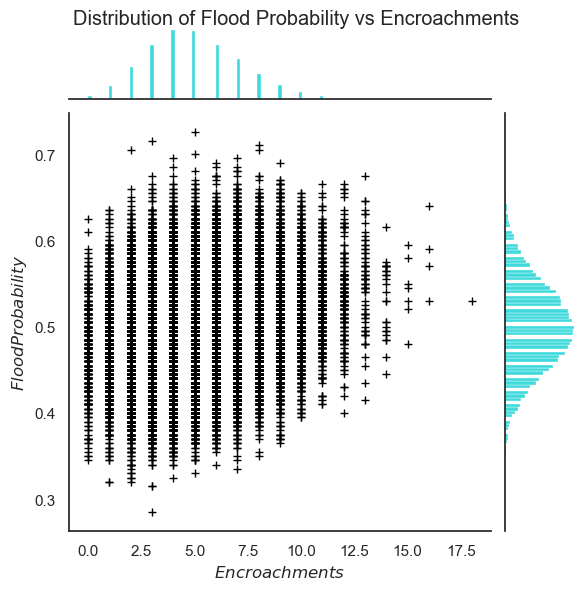

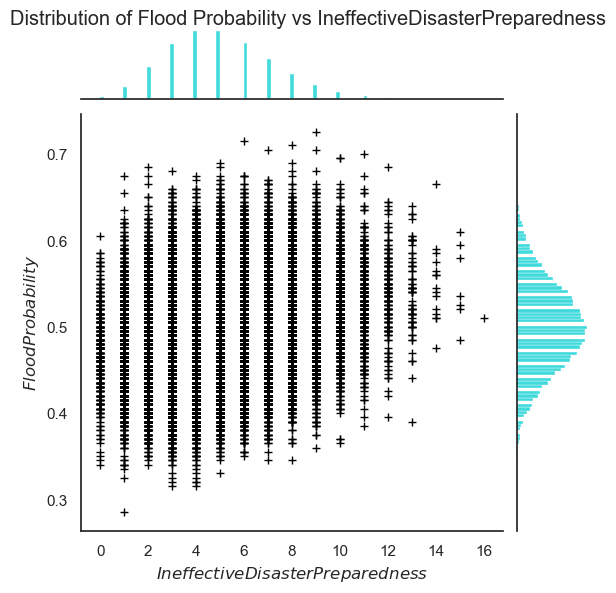

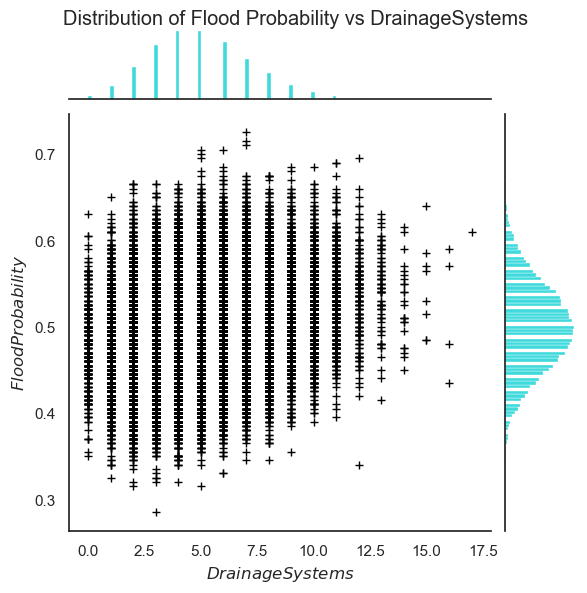

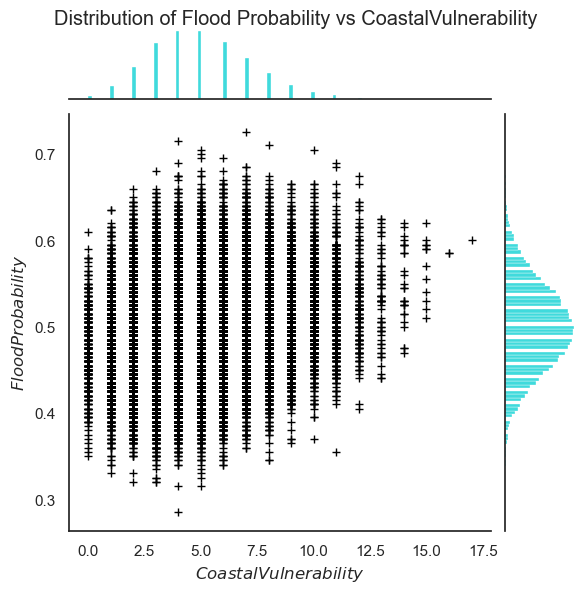

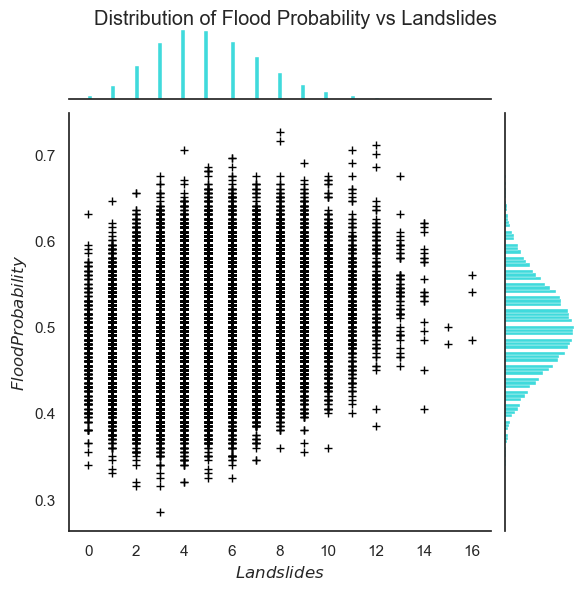

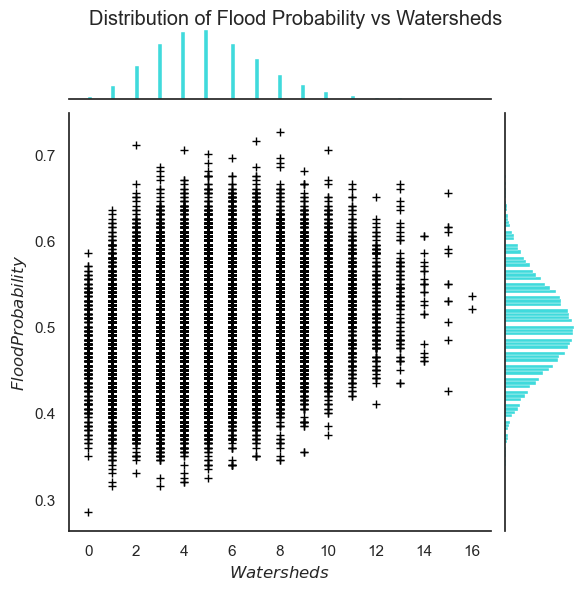

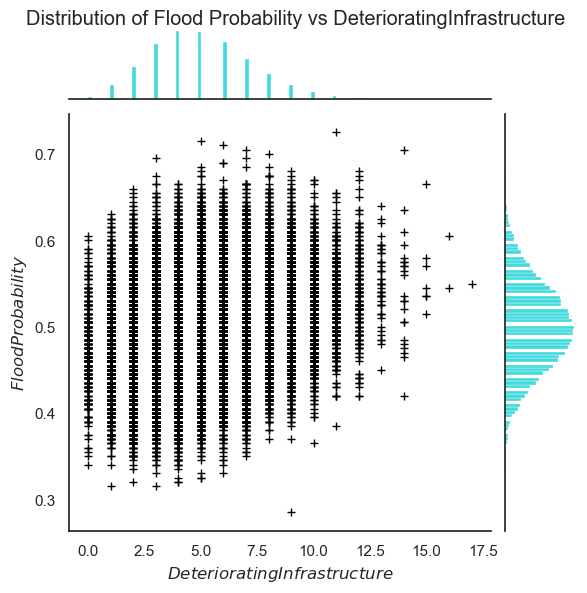

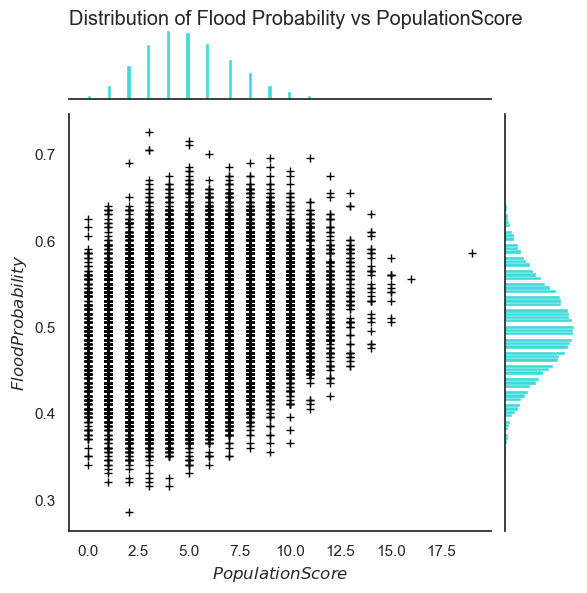

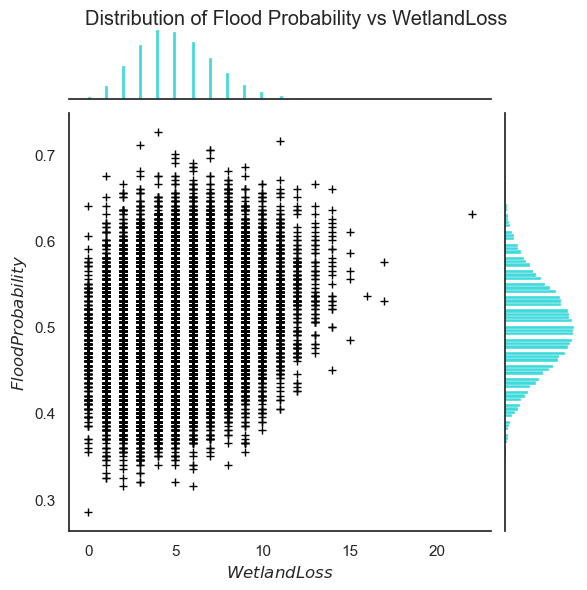

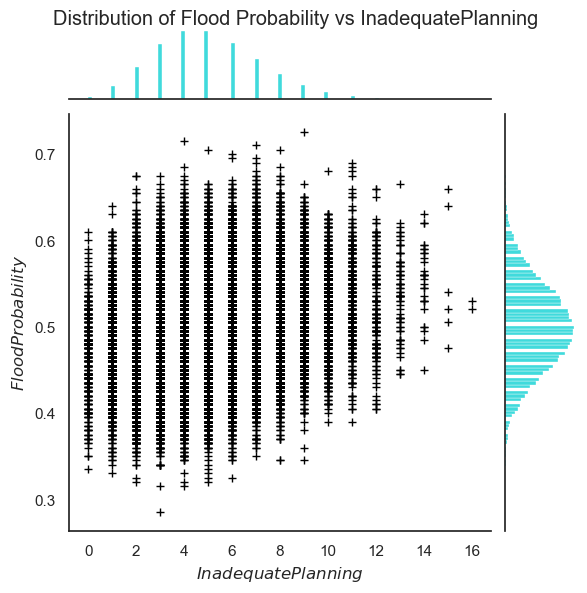

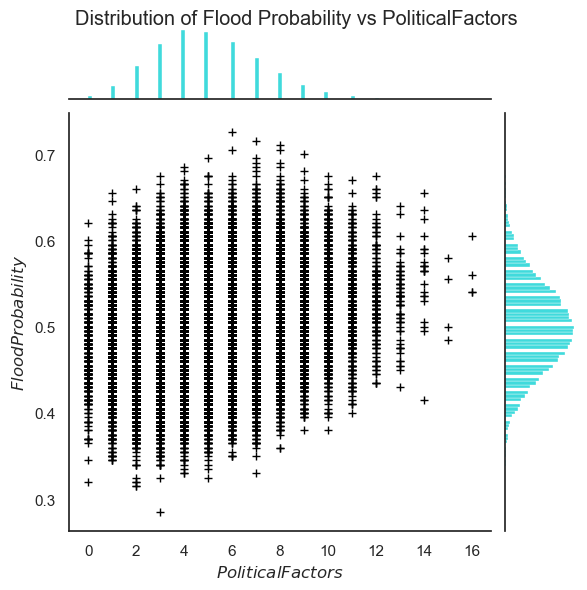

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_data_drop_id' is your dataset and it has been preprocessed appropriately
features = train_data_drop_id.columns.drop('FloodProbability')  # Exclude target variable 'FloodProbability'

# Loop through each feature in the dataset to plot jointplots
for feature in features:
    sns.set_theme(style="white", palette=None)  # Set the theme for the plot
    # Create a jointplot to visualize the relationship between each feature and 'FloodProbability'
    g = sns.jointplot(x=feature, y="FloodProbability", data=train_data_drop_id, kind="scatter", color="darkturquoise")
    # Overlay a scatter plot with black '+' markers
    g.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="+")
    # Make the KDE plot (kernel density estimate) transparent
    g.ax_joint.collections[0].set_alpha(0)  
    # Set axis labels
    g.set_axis_labels(f"${feature}$", "$FloodProbability$")
    # Set the title of the plot
    g.fig.suptitle(f'Distribution of Flood Probability vs {feature}')
    g.fig.subplots_adjust(top=0.95)  # Adjust the title position to avoid overlap with plots
    
    plt.show()  # Display the plot


选择特征：首先，排除了目标变量 FloodProbability，选择其他特征进行分析。

绘制联合图：通过 sns.jointplot 绘制每个特征与 FloodProbability 之间的散点图，使用 darkturquoise 颜色，显示数据的分布。

叠加散点图：使用黑色 + 标记叠加到图上，使得每个数据点更加显眼。

透明 KDE 图：将核密度估计（KDE）图设置为透明，这样可以更清晰地看到散点分布。

设置轴标签和标题：为每个图设置 x 轴和 y 轴的标签，并为图表添加标题。

显示图表：最后，显示每个特征与 FloodProbability 之间的分布关系图

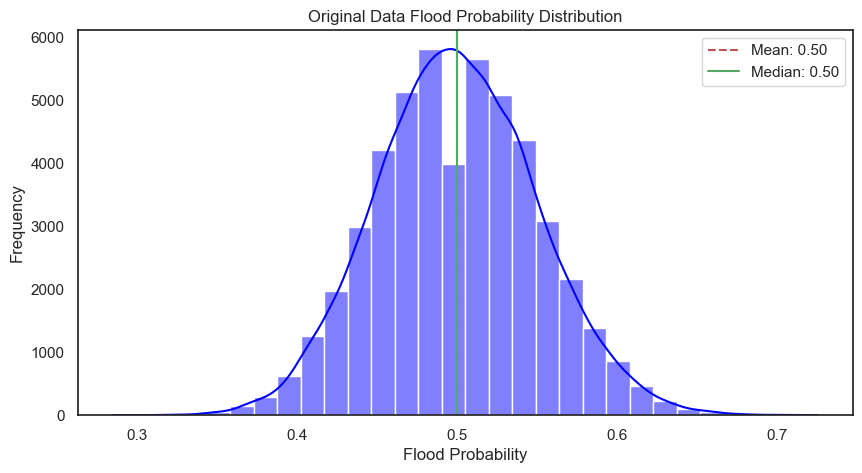

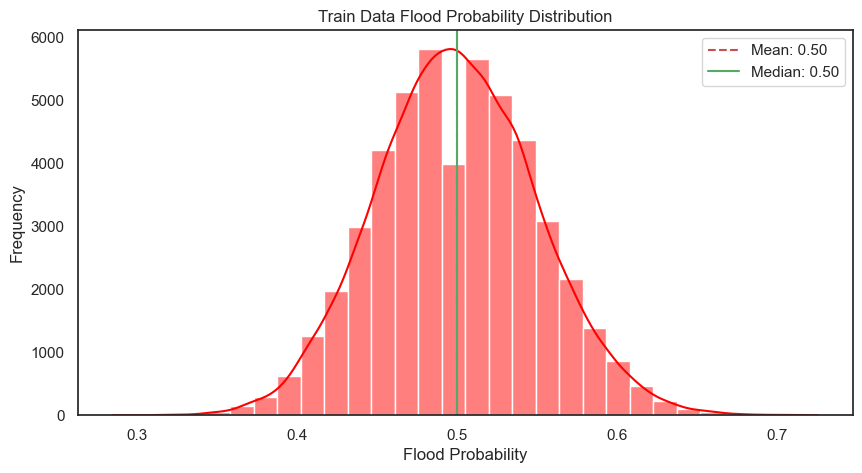

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot the distribution of a column with statistical markers (mean and median)
def plot_distribution_with_stats(data, column, title, color):
    plt.figure(figsize=(10, 5))  # Set the figure size for the plot
    sns.histplot(data[column], kde=True, color=color, bins=30)  # Plot the histogram with KDE (Kernel Density Estimate)
    
    # Calculate mean and median of the specified column
    mean_value = data[column].mean()  
    median_value = data[column].median()
    
    # Add vertical lines for mean and median
    plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')  # Mean line in red
    plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')  # Median line in green
    
    plt.title(title)  # Set the title for the plot
    plt.xlabel('Flood Probability')  # Label the x-axis
    plt.ylabel('Frequency')  # Label the y-axis
    plt.legend()  # Show the legend for the plot
    plt.show()  # Display the plot

# Plot distribution for 'FloodProbability' in the original data
plot_distribution_with_stats(original_data, 'FloodProbability', 'Original Data Flood Probability Distribution', 'blue')

# Plot distribution for 'FloodProbability' in the train data
plot_distribution_with_stats(train_data, 'FloodProbability', 'Train Data Flood Probability Distribution', 'red')


In [16]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality on 'FloodProbability' column in original data
flood_shapiro_test = shapiro(original_data['FloodProbability'])

# Perform Shapiro-Wilk test for normality on 'FloodProbability' column in train data
train_shapiro_test = shapiro(train_data['FloodProbability'])

# Print the results of the Shapiro-Wilk test for the original data
print("Flood Data Shapiro-Wilk Test:")
print(f"Statistic: {flood_shapiro_test.statistic}, p-value: {flood_shapiro_test.pvalue}")

# Print the results of the Shapiro-Wilk test for the train data
print("\nTrain Data Shapiro-Wilk Test:")
print(f"Statistic: {train_shapiro_test.statistic}, p-value: {train_shapiro_test.pvalue}")


Flood Data Shapiro-Wilk Test:
Statistic: 0.9986434578895569, p-value: 2.0334614602603464e-19

Train Data Shapiro-Wilk Test:
Statistic: 0.9986434578895569, p-value: 2.0334614602603464e-19


使用了 Shapiro-Wilk 检验（一个正态性检验）来测试原始数据和训练数据中 FloodProbability 列是否符合正态分布。具体步骤如下：


导入 shapiro 检验：从 scipy.stats 中导入 shapiro 函数，用于执行 Shapiro-Wilk 检验。

对原始数据进行检验：对原始数据集中的 FloodProbability 列执行 Shapiro-Wilk 检验。

对训练数据进行检验：对训练数据集中的 FloodProbability 列执行 Shapiro-Wilk 检验。

输出检验结果：打印每个数据集的统计量（Statistic）和 p 值（p-value）。p 值小于0.05时，表示数据不符合正态分布。

<AxesSubplot:title={'center':'Log Normal'}, xlabel='FloodProbability'>

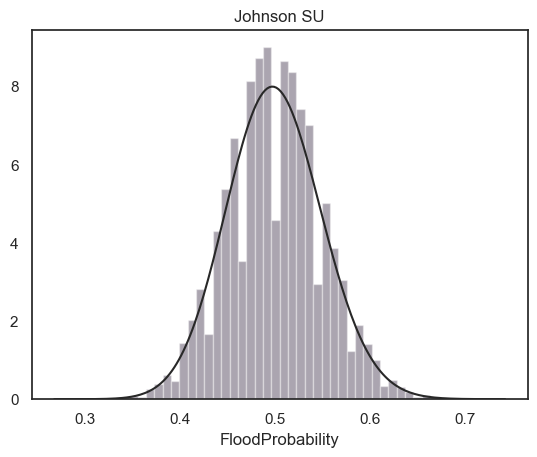

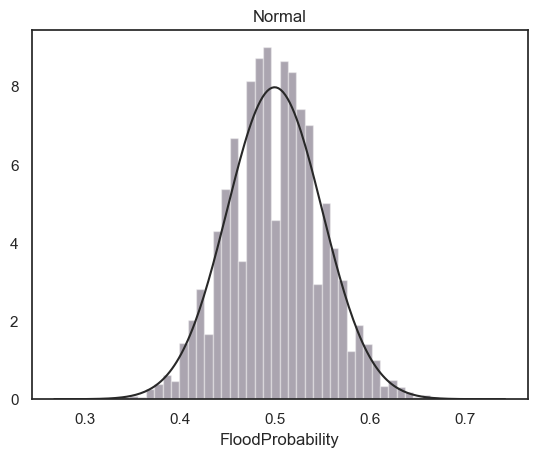

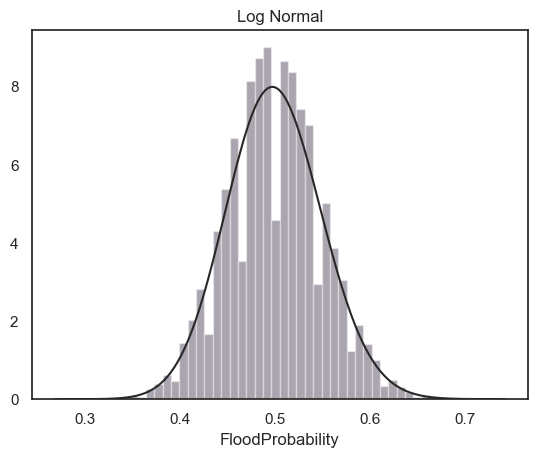

In [43]:
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Select the 'FloodProbability' column from the original dataset
y = original_data['FloodProbability']

# Plot the distribution fitted with the Johnson SU distribution
plt.figure(1)
plt.title('Johnson SU')  # Set the title of the plot
sns.distplot(y, kde=False, fit=st.johnsonsu)  # Fit the data to the Johnson SU distribution and plot

# Plot the distribution fitted with the Normal distribution
plt.figure(2)
plt.title('Normal')  # Set the title of the plot
sns.distplot(y, kde=False, fit=st.norm)  # Fit the data to the Normal distribution and plot

# Plot the distribution fitted with the Log Normal distribution
plt.figure(3)
plt.title('Log Normal')  # Set the title of the plot
sns.distplot(y, kde=False, fit=st.lognorm)  # Fit the data to the Log Normal distribution and plot


<AxesSubplot:title={'center':'Log Normal'}, xlabel='FloodProbability'>

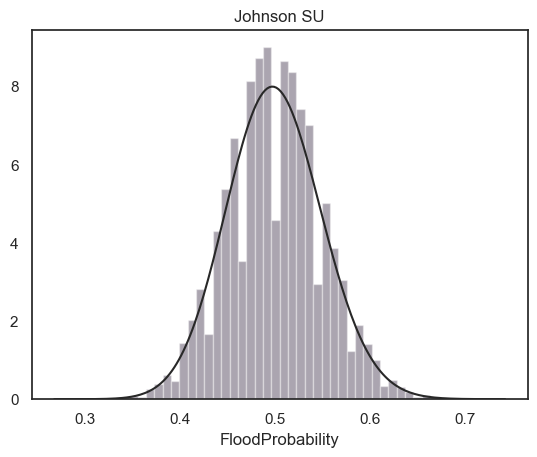

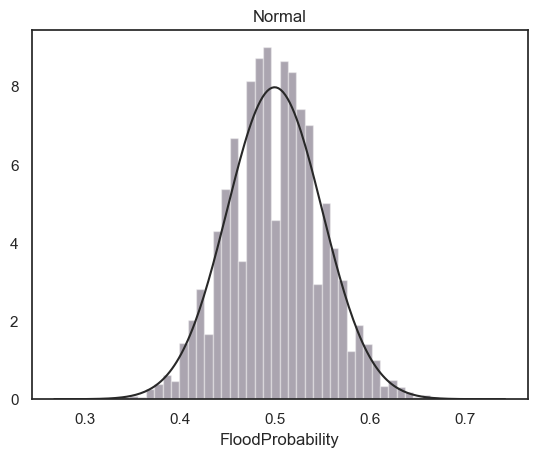

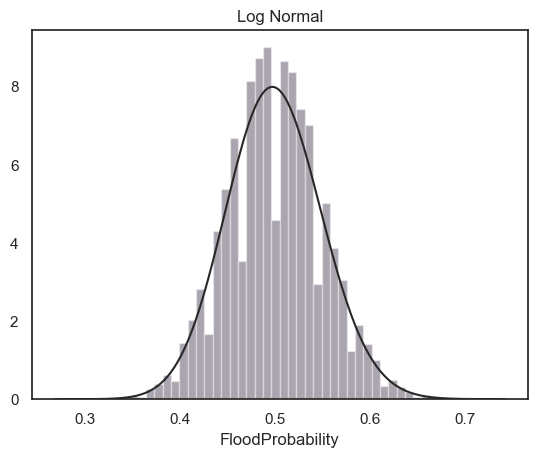

In [43]:
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Select the 'FloodProbability' column from the original dataset
y = original_data['FloodProbability']

# Plot the distribution fitted with the Johnson SU distribution
plt.figure(1)
plt.title('Johnson SU')  # Set the title of the plot
sns.distplot(y, kde=False, fit=st.johnsonsu)  # Fit the data to the Johnson SU distribution and plot

# Plot the distribution fitted with the Normal distribution
plt.figure(2)
plt.title('Normal')  # Set the title of the plot
sns.distplot(y, kde=False, fit=st.norm)  # Fit the data to the Normal distribution and plot

# Plot the distribution fitted with the Log Normal distribution
plt.figure(3)
plt.title('Log Normal')  # Set the title of the plot
sns.distplot(y, kde=False, fit=st.lognorm)  # Fit the data to the Log Normal distribution and plot


对原始数据中的 FloodProbability 列进行拟合，并展示与三种不同分布的对比：Johnson SU分布、正态分布和对数正态分布。具体步骤如下：


选择数据列：从原始数据集中选择 FloodProbability 列作为待分析的数据。

绘制拟合为Johnson SU分布的图形：使用 sns.distplot 将数据拟合到 Johnson SU 分布，并绘制直方图，kde=False 表示不显示核密度估计。

绘制拟合为正态分布的图形：使用 sns.distplot 将数据拟合到正态分布，并绘制直方图。

绘制拟合为对数正态分布的图形：使用 sns.distplot 将数据拟合到对数正态分布，并绘制直方图。

<AxesSubplot: title={'center': 'Log Normal'}, xlabel='FloodProbability'>

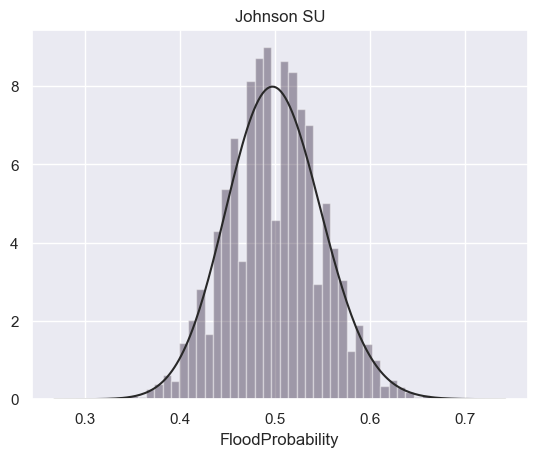

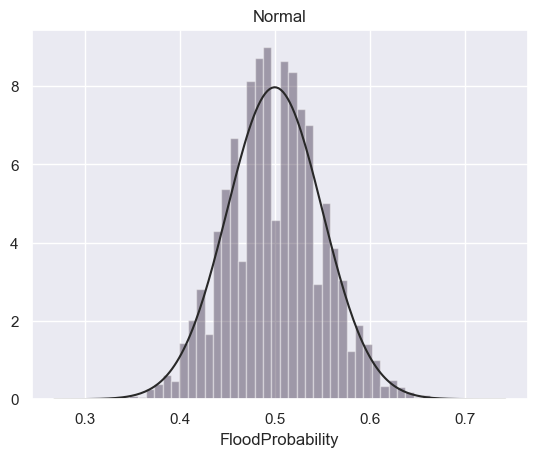

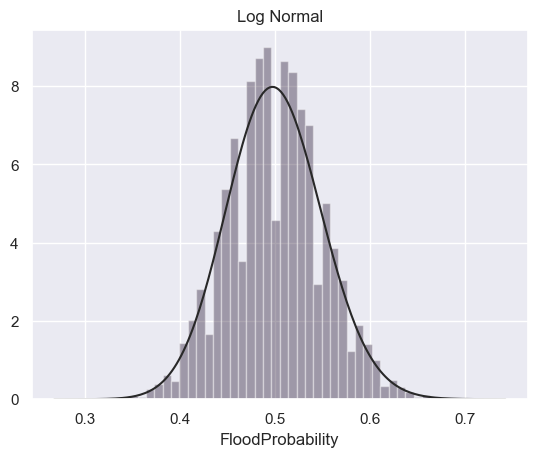

In [8]:
y = train_data['FloodProbability']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)
#for training result

In [9]:
import numpy as np
import scipy.stats as st
from sklearn.metrics import mean_squared_error

# 计算 AIC
def calculate_aic(data, dist_name, params):
    n = len(data)  # 样本数
    k = len(params)  # 参数个数
    log_likelihood = np.sum(np.log(dist_name.pdf(data, *params)))  # 对数似然
    aic = -2 * log_likelihood + 2 * k
    return aic

# 计算均方误差 (MSE)
def calculate_mse(data, dist_name, params):
    pdf_values = dist_name.pdf(data, *params)
    mse = mean_squared_error(data, pdf_values)
    return mse

# 计算 Kolmogorov-Smirnov (K-S) 检验
def calculate_ks(data, dist_name, params):
    cdf_values = dist_name.cdf(data, *params)
    empirical_cdf = np.arange(1, len(data) + 1) / len(data)  # ECDF
    ks_statistic = np.max(np.abs(empirical_cdf - cdf_values))  # 最大偏差
    return ks_statistic

# 拟合每个分布并计算指标
distributions = {
    "Johnson SU": st.johnsonsu,
    "Normal": st.norm,
    "Log Normal": st.lognorm
}

results = {}

for name, dist in distributions.items():
    # 拟合分布
    params = dist.fit(y)
    
    # 计算指标
    aic = calculate_aic(y, dist, params)
    mse = calculate_mse(y, dist, params)
    ks = calculate_ks(y, dist, params)
    
    # 保存结果
    results[name] = {"AIC": aic, "MSE": mse, "KS": ks}

# 输出结果
for name, metrics in results.items():
    print(f"{name}: AIC={metrics['AIC']:.2f}, MSE={metrics['MSE']:.5f}, KS={metrics['KS']:.5f}")


Johnson SU: AIC=-157679.30, MSE=31.42371, KS=0.99681
Normal: AIC=-157607.61, MSE=31.32852, KS=0.99604
Log Normal: AIC=-157681.42, MSE=31.39984, KS=0.99684


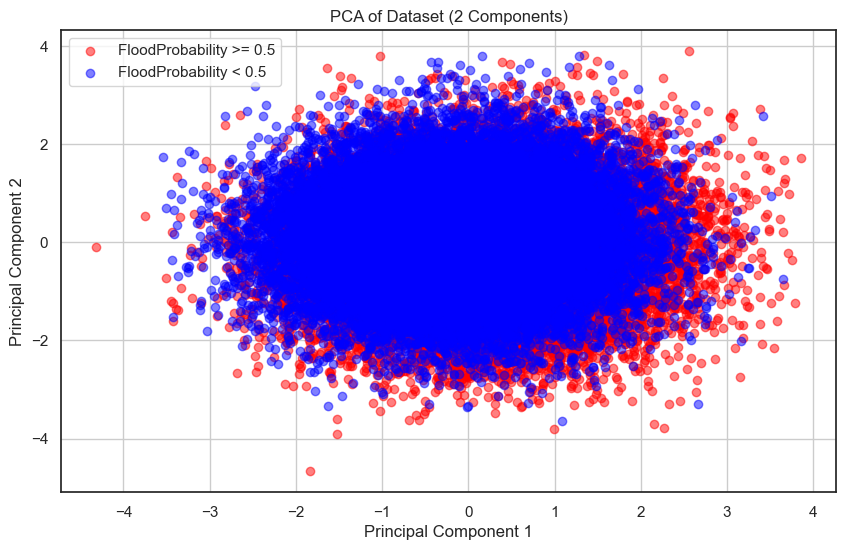

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Prepare the data for PCA by selecting the feature columns and creating binary labels based on 'FloodProbability'
features = train_data_drop_id.columns[1:-1]  # Exclude 'id' and 'FloodProbability' columns
X = train_data_drop_id[features]  # Feature matrix
y = train_data_drop_id['FloodProbability'] > 0.5  # Create binary labels based on FloodProbability threshold (0.5)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize the feature matrix

# Apply PCA to reduce the data to 2 components
pca = PCA(n_components=2)  # Set the number of components to 2
X_pca = pca.fit_transform(X_scaled)  # Apply PCA to the standardized data

# Plot the result of PCA
plt.figure(figsize=(10, 6))
# Plot the points where 'FloodProbability' >= 0.5 with red color
plt.scatter(X_pca[y, 0], X_pca[y, 1], label='FloodProbability >= 0.5', alpha=0.5, color='red')
# Plot the points where 'FloodProbability' < 0.5 with blue color
plt.scatter(X_pca[~y, 0], X_pca[~y, 1], label='FloodProbability < 0.5', alpha=0.5, color='blue')
plt.title('PCA of Dataset (2 Components)')  # Set the title of the plot
plt.xlabel('Principal Component 1')  # Label for the x-axis
plt.ylabel('Principal Component 2')  # Label for the y-axis
plt.legend()  # Show the legend
plt.grid(True)  # Enable grid on the plot
plt.show()  # Display the plot


数据准备：

从 train_data_drop_id 数据集中选择特征列，排除 id 和 FloodProbability 列。
创建基于 FloodProbability 列的二进制标签（如果 FloodProbability 大于 0.5，则为 True，否则为 False）。
数据标准化：

使用 StandardScaler 对特征数据进行标准化处理，使其均值为 0，方差为 1。
应用PCA降维：

使用 PCA 降维，将数据降到两个主成分（n_components=2），用于二维可视化。
绘制PCA结果：

使用 matplotlib 绘制散点图，展示通过PCA降维后的数据：
FloodProbability >= 0.5 的数据点用红色表示。
FloodProbability < 0.5 的数据点用蓝色表示。
图中显示了两个主成分的分布，帮助识别不同类别（洪水概率高低）的数据如何在降维后分布。

Explained Variance Ratio: [0.05476813 0.05430117]


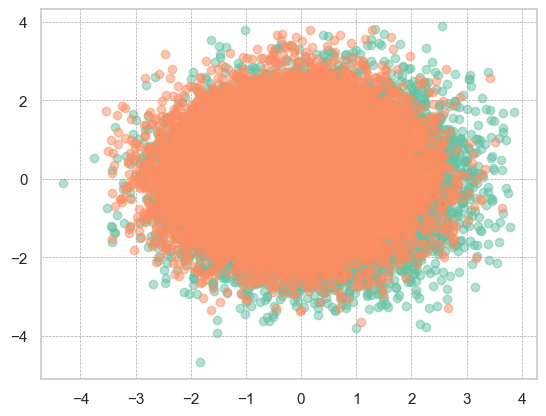

In [52]:
def plot_pca(X, y, n_components=2, title='PCA Visualization', threshold=0.5):
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Plot PCA results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[y, 0], X_pca[y, 1], label=f'Label >= {threshold}', alpha=0.5, color='red')
    plt.scatter(X_pca[~y, 0], X_pca[~y, 1], label=f'Label < {threshold}', alpha=0.5, color='blue')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance}')

import seaborn as sns
sns.set_theme(style="whitegrid")
colors = sns.color_palette('Set2', 2)

plt.scatter(X_pca[y, 0], X_pca[y, 1], label='Label >= 0.5', alpha=0.5, color=colors[0])
plt.scatter(X_pca[~y, 0], X_pca[~y, 1], label='Label < 0.5', alpha=0.5, color=colors[1])

def plot_pca_dynamic(data, label_col, exclude_cols=['id'], n_components=2):
    features = [col for col in data.columns if col not in exclude_cols + [label_col]]
    X = data[features]
    y = data[label_col] > 0.5
    plot_pca(X, y, n_components=n_components, title=f'PCA for {label_col}')

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

def plot_pca_multiclass(X, y, n_components=2):
    unique_classes = y.unique()
    colors = sns.color_palette('husl', len(unique_classes))
    
    for i, class_label in enumerate(unique_classes):
        plt.scatter(X_pca[y == class_label, 0], X_pca[y == class_label, 1], 
                    label=f'Class {class_label}', alpha=0.5, color=colors[i])


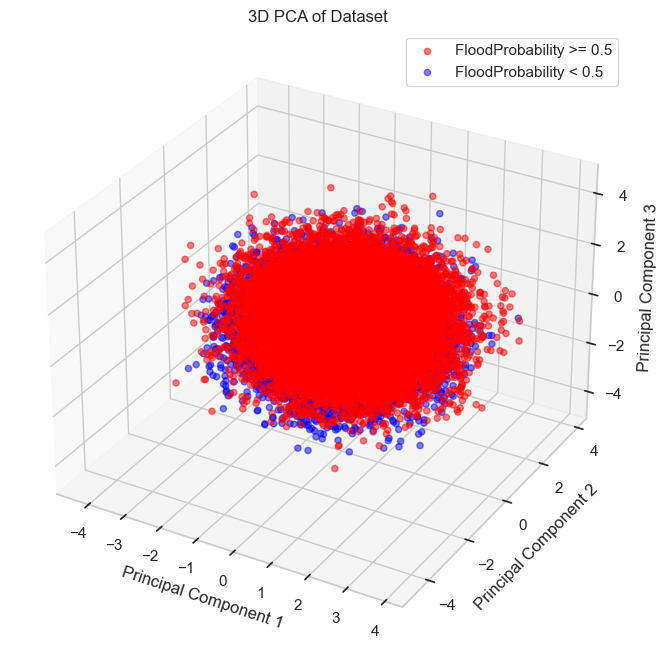

In [53]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[y, 0], X_pca[y, 1], X_pca[y, 2], label='FloodProbability >= 0.5', alpha=0.5, color='red')
ax.scatter(X_pca[~y, 0], X_pca[~y, 1], X_pca[~y, 2], label='FloodProbability < 0.5', alpha=0.5, color='blue')
ax.set_title('3D PCA of Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

df1 = pd.read_csv('F:\Lab_ai\project_bigdata\archive (1)\train.csv')#训练集
df2 = pd.read_csv('F:\Lab_ai\project_bigdata\archive (1)\test.csv')#测试集

# Initialize and fit the linear regression model
line = LinearRegression()
line.fit(X_train, y_train)

# Make predictions
preds = line.predict(X_valid)

# Calculate the mean absolute error and R² score
mse = mean_absolute_error(y_valid, preds)
r2 = r2_score(y_valid, preds)

# Print the results
print("Mean Absolute Error:", mse)
print("R² Score:", r2)


NameError: name 'X_train' is not defined

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load the datasets
train_data = pd.read_csv(r'F:\Lab_ai\project_bigdata\archive (1)\train.csv')  # 训练集
test_data = pd.read_csv(r'F:\Lab_ai\project_bigdata\archive (1)\test.csv')  # 测试集

# Separate features and target variable
# 假设 'target' 是目标列，其他列是特征（请根据数据具体修改）
X = train_data.drop(columns=['target'])
y = train_data['target']

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
preds = model.predict(X_valid)

# Calculate the mean absolute error and R² score
mae = mean_absolute_error(y_valid, preds)
r2 = r2_score(y_valid, preds)

# Print the results
print("Mean Absolute Error:", mae)
print("R² Score:", r2)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 3: invalid start byte

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import warnings
import matplotlib.gridspec as gridspec

warnings.filterwarnings(("ignore"))


# 设置字体以便支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 加载数据
#df = pd.read_csv(r'F:\Lab_ai\project_bigdata\archive (1)\train.csv')
#print(df)

import pandas as pd

# 指定编码读取文件
df = pd.read_csv(r'F:\Lab_ai\project_bigdata\archive (1)\train.csv', encoding='gbk')

# 查看数据
print(df.head())


# 2. 定义特征和目标变量
features = ['季风强度', '地形排水', '河流管理', '森林砍伐', '城市化', '气候变化', '大坝质量',
            '淤积', '农业实践', '侵蚀', '无效防灾', '排水系统', '海岸脆弱性', '滑坡', '流域',
            '基础设施恶化', '人口得分', '湿地损失', '规划不足', '政策因素']  # 请替换为实际的特征名称
X = df[features]
y = df['洪水概率']

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 训练XGBoost模型
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.2, random_state=42)
model.fit(X_train_scaled, y_train)

# 6. 在测试集上进行预测
y_pred = model.predict(X_test_scaled)

# 7. 评估模型性能
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")


# 8. 定义风险等级函数
def get_risk_level(prob):
    if prob < 0.48:
        return '低风险'
    elif prob < 0.54:
        return '中风险'
    else:
        return '高风险'


# 9. 为测试集添加预测的洪水概率和风险等级
test_results = pd.DataFrame(X_test.copy())
test_results['实际洪水概率'] = y_test
test_results['预测洪水概率'] = y_pred
test_results['实际风险等级'] = test_results['实际洪水概率'].apply(get_risk_level)
test_results['预测风险等级'] = test_results['预测洪水概率'].apply(get_risk_level)

# 10. 计算风险等级预测准确率
accuracy = accuracy_score(test_results['实际风险等级'], test_results['预测风险等级'])
print(f"风险等级预测准确率: {accuracy}")

# 11. 打印分类报告
print("\n分类报告:")
print(classification_report(test_results['实际风险等级'], test_results['预测风险等级']))

# 12. 计算不同风险等级下各个特征的均值和方差
risk_levels = ['低风险', '中风险', '高风险']
feature_stats = {}

for level in risk_levels:
    level_data = test_results[test_results['预测风险等级'] == level]
    feature_stats[level] = {
        'mean': level_data[features].mean(),
        'std': level_data[features].std()
    }

# 13. 打印特征统计信息
for level in risk_levels:
    print(f"\n{level} 特征统计:")
    print("均值:")
    print(feature_stats[level]['mean'])
    print("\n标准差:")
    print(feature_stats[level]['std'])

# 14. 灵敏度分析

# a) 特征重要性分析
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': features, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.title('XGBoost Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('xgboost_feature_importance.png')
plt.close()

# b) 排列重要性
perm_importance = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({'feature': features, 'importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(perm_importance_df['feature'], perm_importance_df['importance'])
plt.title('Permutation Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('permutation_importance.png')
plt.close()


def sensitivity_analysis(model, df, features, scaler, n_points=11):
    fig = plt.figure(figsize=(20, 15))
    gs = gridspec.GridSpec(3, 2, figure=fig)

    for i, feature in enumerate(features[:6]):  # 只分析前6个最重要的特征
        ax = fig.add_subplot(gs[i // 2, i % 2])

        X_sample = df[features].mean().to_dict()  # 创建一个样本，其他特征取平均值
        feature_range = np.linspace(1, 11, n_points)
        predictions = []

        for value in feature_range:
            X_sample[feature] = value
            X_scaled = scaler.transform(pd.DataFrame([X_sample], columns=features))  # 确保列的顺序正确
            pred = model.predict(X_scaled)[0]
            predictions.append(pred)

        ax.plot(feature_range, predictions)
        ax.set_title(f'Sensitivity Analysis for {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Predicted Flood Probability')
        ax.set_ylim(0, 1)  # 设置y轴范围为0-1，因为是概率

    plt.tight_layout()
    plt.savefig('sensitivity_analysis.png')
    plt.close()

    return fig


# 在主代码中，确保使用正确的特征顺序
top_features = feature_importance_df['feature'][:6].tolist()
sensitivity_fig = sensitivity_analysis(model, df, features, scaler)  # 使用所有特征，而不是 top_features


# 15. 保存结果到Excel文件
with pd.ExcelWriter('flood_risk_analysis_results.xlsx') as writer:
    # 保存测试集预测结果
    test_results.to_excel(writer, sheet_name='测试集预测结果', index=False)

    # 保存特征统计信息
    for level in risk_levels:
        pd.DataFrame({
            'Feature': features,
            'Mean': feature_stats[level]['mean'],
            'Std': feature_stats[level]['std']
        }).to_excel(writer, sheet_name=f'{level}_特征统计', index=False)

    # 保存模型性能指标
    pd.DataFrame({
        'Metric': ['MSE', 'RMSE', 'R2', 'MAE', '风险等级预测准确率'],
        'Value': [mse, rmse, r2, mae, accuracy]
    }).to_excel(writer, sheet_name='模型性能', index=False)

    # 保存特征重要性
    feature_importance_df.to_excel(writer, sheet_name='XGBoost特征重要性', index=False)
    perm_importance_df.to_excel(writer, sheet_name='排列重要性', index=False)

print("\n分析结果和图表已保存")

   id  季风强度  地形排水  河流管理  森林砍伐  城市化  气候变化  大坝质量  淤积  农业实践  ...  排水系统  海岸脆弱性  \
0   0     5     8     5     8    6     4     4   3     3  ...     5      3   
1   1     6     7     4     4    8     8     3   5     4  ...     7      2   
2   2     6     5     6     7    3     7     1   5     4  ...     7      3   
3   3     3     4     6     5    4     8     4   7     6  ...     2      4   
4   4     5     3     2     6    4     4     3   3     3  ...     2      2   

   滑坡  流域  基础设施恶化  人口得分  湿地损失  规划不足  政策因素   洪水概率  
0   3   5       4     7     5     7     3  0.445  
1   0   3       5     3     3     4     3  0.450  
2   7   5       6     8     2     3     3  0.530  
3   7   4       4     6     5     7     5  0.535  
4   6   6       4     1     2     3     5  0.415  

[5 rows x 22 columns]
Mean Squared Error (MSE): 0.000485107101740443
Root Mean Squared Error (RMSE): 0.022025147031074343
R-squared (R2): 0.8133716078989665
Mean Absolute Error (MAE): 0.017598892945689407
风险等级预测准确率: 0.722251

In [7]:
import pandas as pd

# 指定编码读取文件
df = pd.read_csv(r'F:\Lab_ai\project_bigdata\archive (1)\train.csv', encoding='gbk')

# 查看数据
print(df.head())


   id  季风强度  地形排水  河流管理  森林砍伐  城市化  气候变化  大坝质量  淤积  农业实践  ...  排水系统  海岸脆弱性  \
0   0     5     8     5     8    6     4     4   3     3  ...     5      3   
1   1     6     7     4     4    8     8     3   5     4  ...     7      2   
2   2     6     5     6     7    3     7     1   5     4  ...     7      3   
3   3     3     4     6     5    4     8     4   7     6  ...     2      4   
4   4     5     3     2     6    4     4     3   3     3  ...     2      2   

   滑坡  流域  基础设施恶化  人口得分  湿地损失  规划不足  政策因素   洪水概率  
0   3   5       4     7     5     7     3  0.445  
1   0   3       5     3     3     4     3  0.450  
2   7   5       6     8     2     3     3  0.530  
3   7   4       4     6     5     7     5  0.535  
4   6   6       4     1     2     3     5  0.415  

[5 rows x 22 columns]


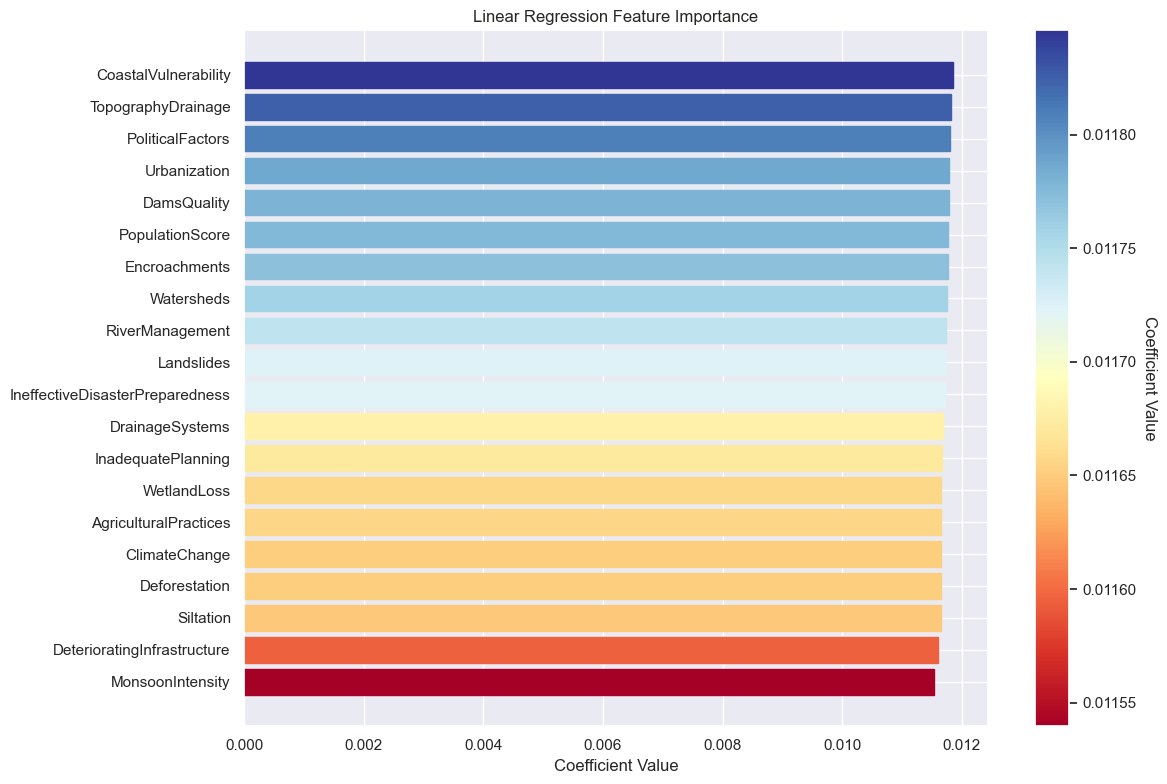

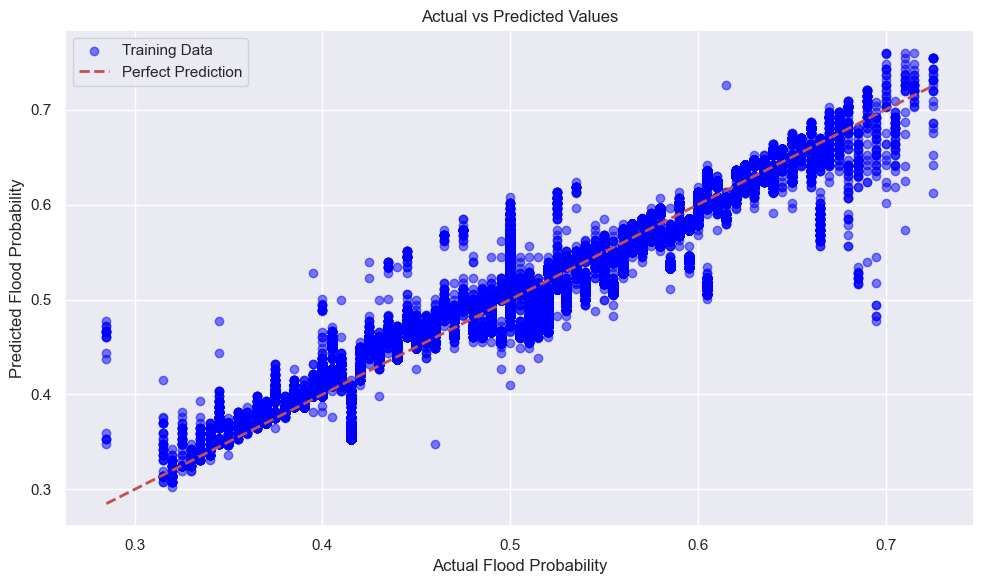

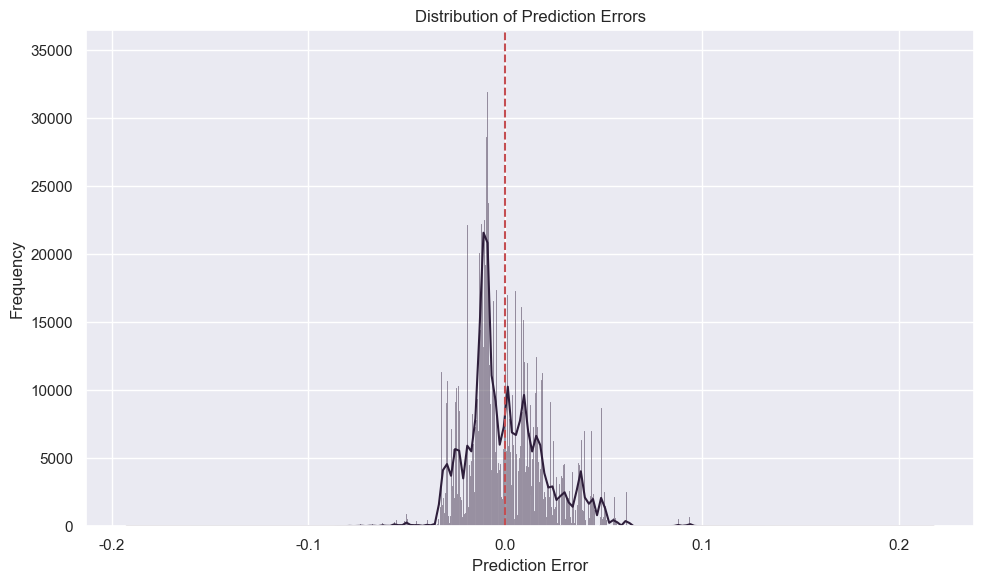

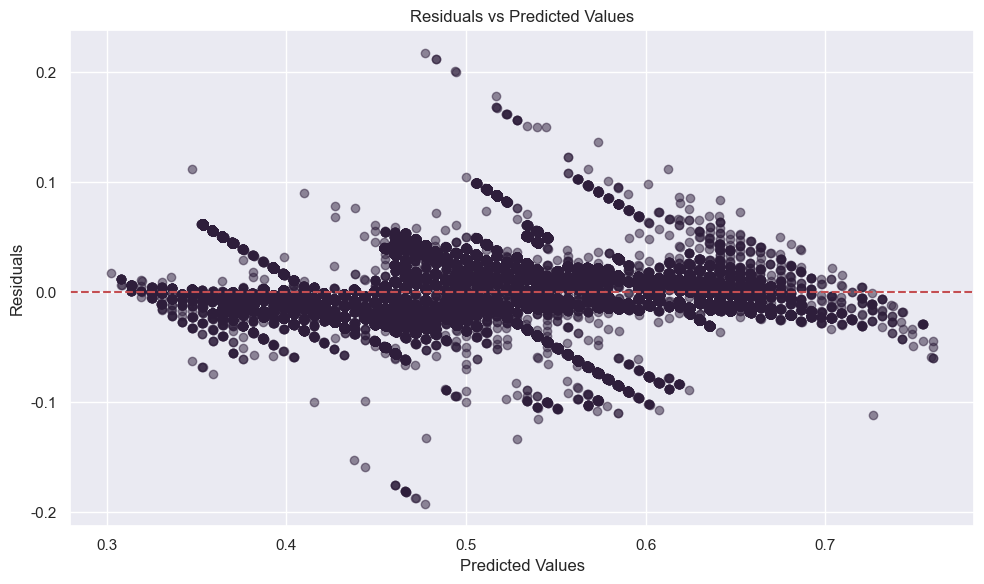

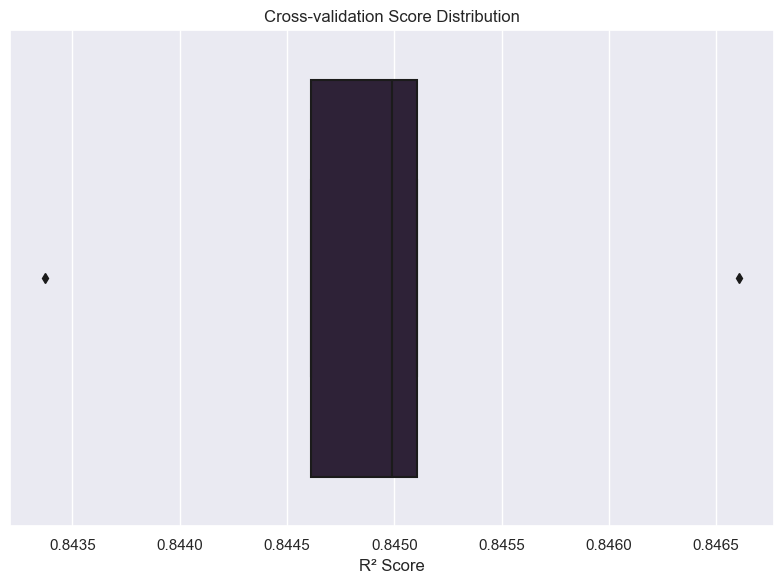


模型性能评估:
训练集 MSE: 0.0004
训练集 RMSE: 0.0201
训练集 R² Score: 0.8450
交叉验证 R² Score (mean ± std): 0.8449 ± 0.0010


In [17]:
# 加载库
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
from math import ceil, log2
from scipy.stats import shapiro
# 导入线性回归相关的库
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()
sns.set_palette('mako')
SNS_CMAP = 'mako'
# 加载所有数据
original_data = pd.read_csv("F:\\Lab_ai\\project_bigdata\\archive (1)\\flood.csv")
train_data = pd.read_csv("F:\\Lab_ai\\project_bigdata\\archive (1)\\playground-series-s4e5\\train.csv")
test_data = pd.read_csv("F:\\Lab_ai\\project_bigdata\\archive (1)\\playground-series-s4e5\\test.csv")


# The summary statistics for train_data
train_data_drop_id = train_data.drop(columns='id')
train_data_drop_id.describe().style.background_gradient(cmap=SNS_CMAP)

# The summary statistics for test_data
test_data_drop_id = test_data.drop(columns='id')
test_data_drop_id.describe().style.background_gradient(cmap=SNS_CMAP)

colors = sns.palettes.color_palette(SNS_CMAP)
# Create a list of datasets and titles
datasets = [original_data, train_data_drop_id, test_data_drop_id]
titles = ['Flood Original Data', 'Train Data', 'Test Data']

# 训练模型


# 数据准备
# 准备训练数据
X_train = train_data_drop_id.drop('FloodProbability', axis=1)
y_train = train_data_drop_id['FloodProbability']
X_test = test_data_drop_id

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# 模型训练
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 模型评估
train_predictions = lr_model.predict(X_train_scaled)
test_predictions = lr_model.predict(X_test_scaled)

# 计算评估指标
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)

# ============ 可视化部分 ============

# 特征重要性可视化
fig, ax = plt.subplots(figsize=(12, 8))  # 明确创建图形和轴对象

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=True)

# 使用颜色映射表示系数大小
bars = ax.barh(feature_importance['Feature'], feature_importance['Coefficient'])
norm = plt.Normalize(feature_importance['Coefficient'].min(), feature_importance['Coefficient'].max())
colors = plt.cm.RdYlBu(norm(feature_importance['Coefficient']))

for bar, color in zip(bars, colors):
    bar.set_color(color)

ax.set_title('Linear Regression Feature Importance')
ax.set_xlabel('Coefficient Value')

# 创建 colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlBu, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)  # 指定 ax 参数
cbar.set_label('Coefficient Value', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

# 2. 预测值与实际值的对比散点图
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, alpha=0.5, c='blue', label='Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted Flood Probability')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()

# 3. 预测误差分布图
plt.figure(figsize=(10, 6))
residuals = y_train - train_predictions
sns.histplot(residuals, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. 残差图
plt.figure(figsize=(10, 6))
plt.scatter(train_predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.tight_layout()
plt.show()

# 5. 交叉验证结果可视化
plt.figure(figsize=(8, 6))
sns.boxplot(x=cv_scores)
plt.title('Cross-validation Score Distribution')
plt.xlabel('R² Score')
plt.tight_layout()
plt.show()

# 打印模型性能指标
print("\n模型性能评估:")
print(f"训练集 MSE: {train_mse:.4f}")
print(f"训练集 RMSE: {np.sqrt(train_mse):.4f}")
print(f"训练集 R² Score: {train_r2:.4f}")
print(f"交叉验证 R² Score (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


